# Lending Club Case Study

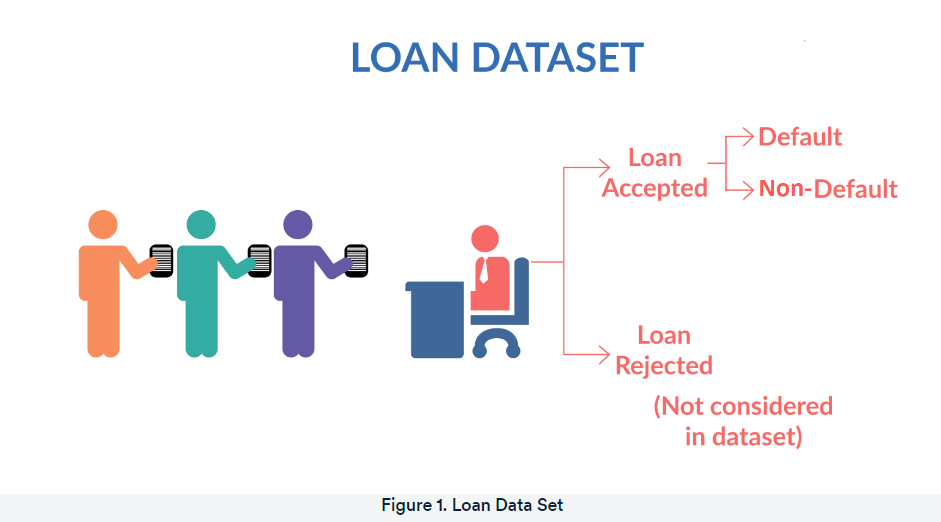

The given loan.csv dataset contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc

import matplotlib, pandas, seaborn, numpy and warning libraries, also set max rows and columns size for pandas, ignore the warnings

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')#to ignore warnings
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', 55)
pd.set_option('display.max_rows', 100)

load the loan dataset and display head

# Data Understanding

In [2]:
#load the data
df=pd.read_csv("loan.csv")
#display head
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,...,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.00,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


# 

display data dictionary

|	LoanStatNew	|	Description	|								
|	------	|	------	|								
|	acc_now_delinq	|	The number of accounts on which the borrower is now delinquent.	|								
|	acc_open_past_24mths	|	Number of trades opened in past 24 months.	|								
|	addr_state	|	The state provided by the borrower in the loan application	|								
|	all_util	|	Balance to credit limit on all trades	|								
|	annual_inc	|	The self-reported annual income provided by the borrower during registration.	|								
|	annual_inc_joint	|	The combined self-reported annual income provided by the co-borrowers during registration	|								
|	application_type	|	Indicates whether the loan is an individual application or a joint application with two co-borrowers	|								
|	avg_cur_bal	|	Average current balance of all accounts	|								
|	bc_open_to_buy	|	Total open to buy on revolving bankcards.	|								
|	bc_util	|	Ratio of total current balance to high credit/credit limit for all bankcard accounts.	|								
|	chargeoff_within_12_mths	|	Number of charge-offs within 12 months	|								
|	collection_recovery_fee	|	post charge off collection fee	|								
|	collections_12_mths_ex_med	|	Number of collections in 12 months excluding medical collections	|								
|	delinq_2yrs	|	The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years	|								
|	delinq_amnt	|	The past-due amount owed for the accounts on which the borrower is now delinquent.	|								
|	desc	|	Loan description provided by the borrower	|								
|	dti	|	A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.	|								
|	dti_joint	|	A ratio calculated using the co-borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co-borrowers' combined self-reported monthly income	|								
|	earliest_cr_line	|	The month the borrower's earliest reported credit line was opened	|								
|	emp_length	|	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 	|								
|	emp_title	|	The job title supplied by the Borrower when applying for the loan.*	|								
|	fico_range_high	|	The upper boundary range the borrower’s FICO at loan origination belongs to.	|								
|	fico_range_low	|	The lower boundary range the borrower’s FICO at loan origination belongs to.	|								
|	funded_amnt	|	The total amount committed to that loan at that point in time.	|								
|	funded_amnt_inv	|	The total amount committed by investors for that loan at that point in time.	|								
|	grade	|	LC assigned loan grade	|								
|	home_ownership	|	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.	|								
|	id	|	A unique LC assigned ID for the loan listing.	|								
|	il_util	|	Ratio of total current balance to high credit/credit limit on all install acct	|								
|	initial_list_status	|	The initial listing status of the loan. Possible values are – W, F	|								
|	inq_fi	|	Number of personal finance inquiries	|								
|	inq_last_12m	|	Number of credit inquiries in past 12 months	|								
|	inq_last_6mths	|	The number of inquiries in past 6 months (excluding auto and mortgage inquiries)	|								
|	installment	|	The monthly payment owed by the borrower if the loan originates.	|								
|	int_rate	|	Interest Rate on the loan	|								
|	issue_d	|	The month which the loan was funded	|								
|	last_credit_pull_d	|	The most recent month LC pulled credit for this loan	|								
|	last_fico_range_high	|	The upper boundary range the borrower’s last FICO pulled belongs to.	|								
|	last_fico_range_low	|	The lower boundary range the borrower’s last FICO pulled belongs to.	|								
|	last_pymnt_amnt	|	Last total payment amount received	|								
|	last_pymnt_d	|	Last month payment was received	|								
|	loan_amnt	|	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.	|								
|	loan_status	|	Current status of the loan	|								
|	max_bal_bc	|	Maximum current balance owed on all revolving accounts	|								
|	member_id	|	A unique LC assigned Id for the borrower member.	|								
|	mo_sin_old_il_acct	|	Months since oldest bank installment account opened	|								
|	mo_sin_old_rev_tl_op	|	Months since oldest revolving account opened	|								
|	mo_sin_rcnt_rev_tl_op	|	Months since most recent revolving account opened	|								
|	mo_sin_rcnt_tl	|	Months since most recent account opened	|								
|	mort_acc	|	Number of mortgage accounts.	|								
|	mths_since_last_delinq	|	The number of months since the borrower's last delinquency.	|								
|	mths_since_last_major_derog	|	Months since most recent 90-day or worse rating	|								
|	mths_since_last_record	|	The number of months since the last public record.	|								
|	mths_since_rcnt_il	|	Months since most recent installment accounts opened	|								
|	mths_since_recent_bc	|	Months since most recent bankcard account opened.	|								
|	mths_since_recent_bc_dlq	|	Months since most recent bankcard delinquency	|								
	mths_since_recent_inq	|	Months since most recent inquiry.	|								
	mths_since_recent_revol_delinq	|	Months since most recent revolving delinquency.	|								
	next_pymnt_d	|	Next scheduled payment date	|								
	num_accts_ever_120_pd	|	Number of accounts ever 120 or more days past due	|								
	num_actv_bc_tl	|	Number of currently active bankcard accounts	|								
	num_actv_rev_tl	|	Number of currently active revolving trades	|								
	num_bc_sats	|	Number of satisfactory bankcard accounts	|								
	num_bc_tl	|	Number of bankcard accounts	|								
	num_il_tl	|	Number of installment accounts	|								
	num_op_rev_tl	|	Number of open revolving accounts	|								
	num_rev_accts	|	Number of revolving accounts	|								
	num_rev_tl_bal_gt_0	|	Number of revolving trades with balance >0	|								
	num_sats	|	Number of satisfactory accounts	|								
	num_tl_120dpd_2m	|	Number of accounts currently 120 days past due (updated in past 2 months)	|								
	num_tl_30dpd	|	Number of accounts currently 30 days past due (updated in past 2 months)	|								
	num_tl_90g_dpd_24m	|	Number of accounts 90 or more days past due in last 24 months	|								
	num_tl_op_past_12m	|	Number of accounts opened in past 12 months	|								
	open_acc	|	The number of open credit lines in the borrower's credit file.	|								
	open_acc_6m	|	Number of open trades in last 6 months	|								
	open_il_12m	|	Number of installment accounts opened in past 12 months	|								
	open_il_24m	|	Number of installment accounts opened in past 24 months	|								
	open_il_6m	|	Number of currently active installment trades	|								
	open_rv_12m	|	Number of revolving trades opened in past 12 months	|								
	open_rv_24m	|	Number of revolving trades opened in past 24 months	|								
	out_prncp	|	Remaining outstanding principal for total amount funded	|								
	out_prncp_inv	|	Remaining outstanding principal for portion of total amount funded by investors	|								
	pct_tl_nvr_dlq	|	Percent of trades never delinquent	|								
	percent_bc_gt_75	|	Percentage of all bankcard accounts > 75% of limit.	|								
	policy_code	|	"publicly available policy_code=1
new products not publicly available policy_code=2"	|								
	pub_rec	|	Number of derogatory public records	|								
	pub_rec_bankruptcies	|	Number of public record bankruptcies	|								
	purpose	|	A category provided by the borrower for the loan request. 	|								
	pymnt_plan	|	Indicates if a payment plan has been put in place for the loan	|								
	recoveries	|	post charge off gross recovery	|								
	revol_bal	|	Total credit revolving balance	|								
	revol_util	|	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.	|								
	sub_grade	|	LC assigned loan subgrade	|								
	tax_liens	|	Number of tax liens	|								
	term	|	The number of payments on the loan. Values are in months and can be either 36 or 60.	|								
	title	|	The loan title provided by the borrower	|								
	tot_coll_amt	|	Total collection amounts ever owed	|								
	tot_cur_bal	|	Total current balance of all accounts	|								
	tot_hi_cred_lim	|	Total high credit/credit limit	|								
	total_acc	|	The total number of credit lines currently in the borrower's credit file	|								
	total_bal_ex_mort	|	Total credit balance excluding mortgage	|								
	total_bal_il	|	Total current balance of all installment accounts	|								
	total_bc_limit	|	Total bankcard high credit/credit limit	|								
	total_cu_tl	|	Number of finance trades	|								
	total_il_high_credit_limit	|	Total installment high credit/credit limit	|								
	total_pymnt	|	Payments received to date for total amount funded	|								
	total_pymnt_inv	|	Payments received to date for portion of total amount funded by investors	|								
	total_rec_int	|	Interest received to date	|								
	total_rec_late_fee	|	Late fees received to date	|								
	total_rec_prncp	|	Principal received to date	|								
	total_rev_hi_lim  	|	Total revolving high credit/credit limit	|								
	url	|	URL for the LC page with listing data.	|								
	verification_status	|	Indicates if income was verified by LC, not verified, or if the income source was verified	|								
	verified_status_joint	|	Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified	|								
	zip_code	|	The first 3 numbers of the zip code provided by the borrower in the loan application.	|								
							
												


In [3]:
#display columns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [4]:
#describe df data
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,...,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,14035.00,2786.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39661.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,39020.00,39678.00,0.00,0.00,0.00,0.00
mean,683131.91,850463.56,11219.44,10947.71,10397.45,324.56,68968.93,13.32,0.15,0.87,35.90,69.70,9.29,0.06,13382.53,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2678.83,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.00,NaN,NaN,NaN,NaN
std,210694.13,265678.31,7456.67,7187.24,7128.45,208.87,63793.77,6.68,0.49,1.07,22.02,43.82,4.40,0.24,15885.02,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,4447.14,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.20,0.00,NaN,NaN,NaN,NaN
min,54734.00,70699.00,500.00,500.00,0.00,15.69,4000.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
25%,516221.00,666780.00,5500.00,5400.00,5000.00,167.02,40404.00,8.17,0.00,0.00,18.00,22.00,6.00,0.00,3703.00,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,218.68,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
50%,665665.00,850812.00,10000.00,9600.00,8975.00,280.22,59000.00,13.40,0.00,1.00,34.00,90.00,9.00,0.00,8850.00,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,546.14,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
75%,837755.00,1047339.00,15000.00,15000.00,14400.00,430.78,82300.00,18.60,0.00,1.00,52.00,104.00,12.00,0.00,17058.00,29.00,0.00,0.00,16534.43,15798.81,13653.26,2833.40,0.00,0.00,0.00,3293.16,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
max,1077501.00,1314167.00,35000.00,35000.00,35000.00,1305.19,6000000.00,29.99,11.00,8.00,120.00,129.00,44.00,4.00,149588.00,90.00,6311.47,6307.37,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,36115.20,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,NaN,NaN,NaN,NaN


In [5]:
#display data types
df.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

In [6]:
#dsiplay info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
#shape of the data frame
df.shape

(39717, 111)

In [8]:
#total sum of nan values
df.isnull().sum().sum()

2263364

Calculate nan columns percentage

In [9]:
null_percentage = round(100*(df.isnull().sum()/len(df.index)),3)

In [10]:
#dsiplay nan values percentage for each column
null_percentage[null_percentage>0]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.98
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


# Data Cleaning and Manipulation

drop the nan cols having more than 5 percent nan values

The dataset happens to contain 59 rows where the values for about 95% of the rows is missing and hence it is felt that they won’t be contributing much to the analysis part.

In [11]:
df.drop(null_percentage[ null_percentage > 5 ].index, axis=1, inplace=True)

In [12]:
df.shape

(39717, 52)

extract each month and year from issue_d,last_pymnt_d,last_credit_pull_d and earliest_cr_line  columns
and derive new columns based on year and month values

In [13]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year
df['issue_d_month'] = pd.DatetimeIndex(df['issue_d']).month

In [14]:
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format='%b-%y')
df['last_pymnt_d_year'] = pd.DatetimeIndex(df['last_pymnt_d']).year
df['last_pymnt_d_month'] = pd.DatetimeIndex(df['last_pymnt_d']).month

In [15]:
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'], format='%b-%y')
df['last_credit_pull_d_year'] = pd.DatetimeIndex(df['last_credit_pull_d']).year
df['last_credit_pull_d_month'] = pd.DatetimeIndex(df['last_credit_pull_d']).month

In [16]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line_year'] = pd.DatetimeIndex(df['earliest_cr_line']).year
df['earliest_cr_line_month'] = pd.DatetimeIndex(df['earliest_cr_line']).month

loan_amt, funded_amt,funded_amt_inv are almost having similar values, so taking any one column is sufficient

The dataset also happens to contain many columns which have only unique values and hence they have been removed from the analysis point of view.

In [17]:
df.drop(["id","member_id","funded_amnt","funded_amnt_inv","pymnt_plan","url","title","zip_code","addr_state","initial_list_status",'out_prncp_inv',"total_pymnt_inv","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","delinq_amnt","tax_liens","earliest_cr_line","issue_d","last_pymnt_d","last_credit_pull_d"],axis=1,inplace=True)

In [18]:
#display head after cleaning
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,earliest_cr_line_year,earliest_cr_line_month
0,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.70%,9,0.00,5863.16,5000.00,863.16,0.00,0.00,0.00,171.62,0.00,2011,12,2015.00,1.00,2016.00,5.00,1985,1
1,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Charged Off,car,1.00,0,5,3,0,1687,9.40%,4,0.00,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.00,2011,12,2013.00,4.00,2013.00,9.00,1999,4
2,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72,0,2,2,0,2956,98.50%,10,0.00,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.00,2011,12,2014.00,6.00,2016.00,5.00,2001,11
3,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Fully Paid,other,20.00,0,1,10,0,5598,21%,37,0.00,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.00,2011,12,2015.00,1.00,2016.00,4.00,1996,2
4,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Current,other,17.94,0,0,15,0,27783,53.90%,38,524.06,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,0.00,2011,12,2016.00,5.00,2016.00,5.00,1996,1


In [19]:
#check pub_rec_bankruptcies value counts
df["pub_rec_bankruptcies"].value_counts()

0.00    37339
1.00     1674
2.00        7
Name: pub_rec_bankruptcies, dtype: int64

In [20]:
#display null values count for each column
df.isnull().sum()

loan_amnt                      0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
loan_status                    0
purpose                        0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp                      0
total_pymnt                    0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
recoveries                     0
collection_recovery_fee        0
last_pymnt_amnt                0
pub_rec_bankruptcies         697
issue_d_year                   0
issue_d_mo

fill null values for emp_length, revol_util and pub_rec_bankruptcies columns

In [21]:
df['emp_length'].fillna('0 year',inplace=True)
df['revol_util'].fillna('0%',inplace=True)
df['pub_rec_bankruptcies'].fillna(0.0,inplace=True)

since we are only interested in fully paid and charged off loans status, we can remove the rows having loan status as CURRENT

In [22]:
df.drop(df.index[df['loan_status'] == 'Current'], inplace=True)

In [23]:
#display value counts for loan_status column
df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

derive new **default_indicator** boolean column from loan_status column

**0: 'Fully Paid',1: 'Charged Off'**

also derive installment_to_income_ratio_percentage column based on installment and monthly income ratio percentage

In [24]:
df['default_indicator'] = np.where(df['loan_status'] == "Fully Paid", 0, 1)
df["installment_to_income_ratio_percentage"]=(df["installment"]/(df["annual_inc"]/12)*100)

In [25]:
#print value_counts for default_indicator and installment_to_income_ratio_percentage columns
print(df['default_indicator'].value_counts())
print(df["installment_to_income_ratio_percentage"].value_counts())

0    32950
1     5627
Name: default_indicator, dtype: int64
3.02     11
7.30      8
6.09      8
4.58      8
3.62      7
         ..
11.16     1
3.44      1
3.02      1
2.53      1
13.93     1
Name: installment_to_income_ratio_percentage, Length: 36228, dtype: int64


modify column values for loan data analysis

emp_length column: "10+ years" to '10 years, "< 1 year" to '0 year'

remove % from int_rate and revol_util columns

remove " months" string from term column

home_ownership column: NONE to OTHER


In [26]:
df['emp_length'] = np.where(df['emp_length'] == "10+ years", '10 years', df['emp_length'])
df['emp_length'] = np.where(df['emp_length'] == "< 1 year", '0 year', df['emp_length'])
df['emp_length'] = df['emp_length'].str.strip(' years').astype(float)
df['int_rate'] = df['int_rate'].str.strip('%').astype(float)
df['revol_util'] = df['revol_util'].str.strip('%').astype(float)
df['home_ownership'] = np.where(df['home_ownership'] == "NONE", 'OTHER', df['home_ownership'])

In [27]:
df['emp_length'].value_counts()

10.00    8488
0.00     5541
2.00     4291
3.00     4012
4.00     3342
5.00     3194
1.00     3169
6.00     2168
7.00     1711
8.00     1435
9.00     1226
Name: emp_length, dtype: int64

finally remove very few rows having null values and drop the duplicate rows

In [28]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(38504, 39)

In [29]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,earliest_cr_line_year,earliest_cr_line_month,default_indicator,installment_to_income_ratio_percentage
0,5000,36 months,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.70,9,0.00,5863.16,5000.00,863.16,0.00,0.00,0.00,171.62,0.00,2011,12,2015.00,1.00,2016.00,5.00,1985,1,0,8.14
1,2500,60 months,15.27,59.83,C,C4,0.00,RENT,30000.00,Source Verified,Charged Off,car,1.00,0,5,3,0,1687,9.40,4,0.00,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.00,2011,12,2013.00,4.00,2013.00,9.00,1999,4,1,2.39
2,2400,36 months,15.96,84.33,C,C5,10.00,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72,0,2,2,0,2956,98.50,10,0.00,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.00,2011,12,2014.00,6.00,2016.00,5.00,2001,11,0,8.26
3,10000,36 months,13.49,339.31,C,C1,10.00,RENT,49200.00,Source Verified,Fully Paid,other,20.00,0,1,10,0,5598,21.00,37,0.00,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.00,2011,12,2015.00,1.00,2016.00,4.00,1996,2,0,8.28
5,5000,36 months,7.90,156.46,A,A4,3.00,RENT,36000.00,Source Verified,Fully Paid,wedding,11.20,0,3,9,0,7963,28.30,12,0.00,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.00,2011,12,2015.00,1.00,2016.00,1.00,2004,11,0,5.22


check the quantile values for continuous value columns

remove outliers based on quantile value for each column

In [30]:
print("\nloan_amnt\n",df["loan_amnt"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nint_rate\n",df["int_rate"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\ninstallment\n",df["installment"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nemp_length\n",df["emp_length"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nannual_inc\n",df["annual_inc"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\ndti\n",df["dti"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\ndelinq_2yrs\n",df["delinq_2yrs"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\ninq_last_6mths\n",df["inq_last_6mths"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nopen_acc\n",df["open_acc"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\npub_rec\n",df["pub_rec"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nrevol_bal\n",df["revol_bal"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nrevol_util\n",df["revol_util"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\ntotal_acc\n",df["total_acc"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nout_prncp\n",df["out_prncp"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\ntotal_pymnt\n",df["total_pymnt"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\ntotal_rec_prncp\n",df["total_rec_prncp"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\ntotal_rec_int\n",df["total_rec_int"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\ntotal_rec_late_fee\n",df["total_rec_late_fee"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nrecoveries\n",df["recoveries"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\ncollection_recovery_fee\n",df["collection_recovery_fee"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\nlast_pymnt_amnt\n",df["last_pymnt_amnt"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))
print("\npub_rec_bankruptcies\n",df["pub_rec_bankruptcies"].quantile([0.15,0.20,0.35,0.50,0.75, 0.98, 0.99, 1.0]))


loan_amnt
 0.15    4000.00
0.20    5000.00
0.35    7000.00
0.50    9600.00
0.75   15000.00
0.98   30000.00
0.99   35000.00
1.00   35000.00
Name: loan_amnt, dtype: float64

int_rate
 0.15    7.51
0.20    7.90
0.35   10.38
0.50   11.71
0.75   14.35
0.98   19.91
0.99   20.99
1.00   24.40
Name: int_rate, dtype: float64

installment
 0.15    124.45
0.20    150.12
0.35    204.85
0.50    278.13
0.75    425.55
0.98    870.39
0.99    931.09
1.00   1305.19
Name: installment, dtype: float64

emp_length
 0.15    1.00
0.20    1.00
0.35    3.00
0.50    4.00
0.75    9.00
0.98   10.00
0.99   10.00
1.00   10.00
Name: emp_length, dtype: float64

annual_inc
 0.15     34000.00
0.20     37200.00
0.35     48000.00
0.50     59000.00
0.75     82000.00
0.98    187000.00
0.99    234582.00
1.00   6000000.00
Name: annual_inc, dtype: float64

dti
 0.15    5.56
0.20    6.92
0.35   10.32
0.50   13.37
0.75   18.56
0.98   24.85
0.99   26.53
1.00   29.99
Name: dti, dtype: float64

delinq_2yrs
 0.15    0.00
0.20    0.0

Display the distribution plot for annual_inc and installment_to_income_ratio_percentage columns

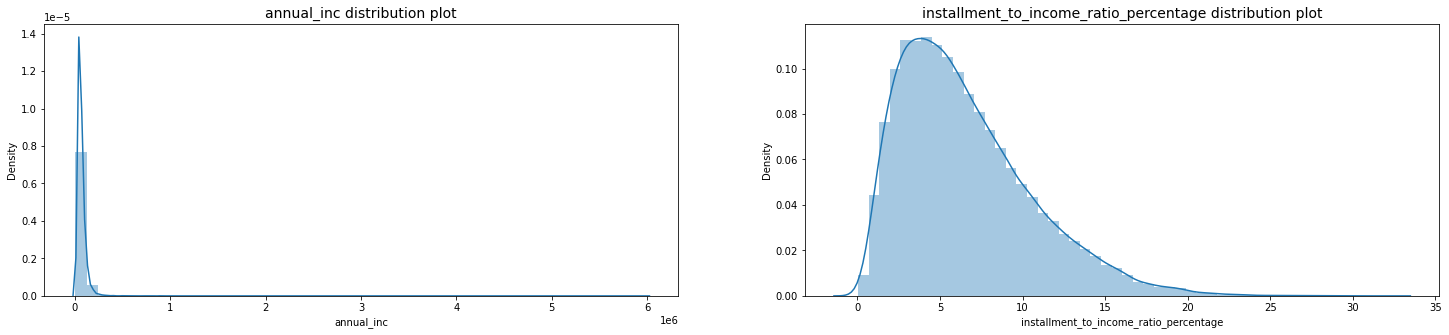

In [31]:
plt.subplots(figsize=(25,5))
plt.subplot(1, 2, 1)
ax1=sns.distplot(df["annual_inc"])
ax1.set_title('annual_inc distribution plot', fontsize=14)
ax1.set(xlabel='annual_inc', ylabel='Density')
plt.subplot(1, 2, 2)
ax1=sns.distplot(df["installment_to_income_ratio_percentage"])
ax1.set_title('installment_to_income_ratio_percentage distribution plot', fontsize=14)
ax1.set(xlabel='installment_to_income_ratio_percentage', ylabel='Density')
plt.show()

removed outliers based on quantile values for each column,
for example annual_inc column has more outliers and we considered upto 90% of qunatile value for this column

In [32]:
df= df[df["loan_amnt"] < df["loan_amnt"].quantile(0.99)]
df= df[df["installment"] < df["installment"].quantile(0.99)]
df= df[df["annual_inc"] < df["annual_inc"].quantile(0.9)]
df = df[df["delinq_2yrs"] < df["delinq_2yrs"].quantile(0.99)]
df = df[df["inq_last_6mths"] < df["inq_last_6mths"].quantile(0.99)]
df = df[df["open_acc"] < df["open_acc"].quantile(0.99)]
df = df[df["pub_rec"] < df["pub_rec"].quantile(0.99)]
df = df[df["revol_bal"] < df["revol_bal"].quantile(0.99)]
df = df[df["total_acc"] < df["total_acc"].quantile(0.99)]
df = df[df["total_pymnt"] < df["total_pymnt"].quantile(0.9)]
df = df[df["recoveries"] < df["recoveries"].quantile(0.99)]
df = df[df["collection_recovery_fee"] < df["collection_recovery_fee"].quantile(0.99)]

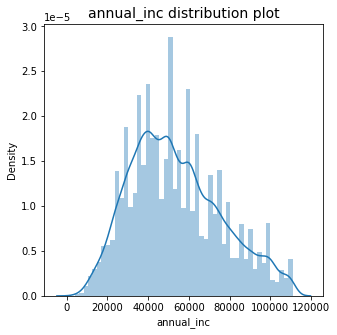

In [33]:
#display annual_inc column distribution 
plt.subplots(figsize=(5,5))
plt.subplot(1, 1, 1)
ax1=sns.distplot(df["annual_inc"])
ax1.set_title('annual_inc distribution plot', fontsize=14)
ax1.set(xlabel='annual_inc', ylabel='Density')
plt.show()

dividing loan_amnt , int_rate ,annual_inc,installment_to_income_ratio_percentage and dti into groups

In [34]:
df["loan_amnt_groups"]=pd.cut(x=df["loan_amnt"], bins=[0,4000,8000,12000,16000,100000], 
                           labels=["Very Low (<4000)","Low (4000-7999)","Medium (8000-11999)","High (12000-15999) ","Very High (>16000)"])
df["int_rate_groups"]=pd.cut(x=df["int_rate"], bins=[0,8,12,16,20,25], 
                           labels=["Very Low (0-7.99)","Low (8-11.99)","Medium (12-15.99)","High (16-19.99)","Very High (>20)"])

df["annual_inc_groups"]=pd.cut(x=df["annual_inc"], bins=[0,20000,40000,60000,80000,100000], 
                           labels=["Very Low (<20000)","Low (20000-39999)","Medium (40000-59999)","High (60000-79999) ","Very High (>10000)"])
df["installment_to_income_ratio_percentage_groups"]=pd.cut(x=df["installment_to_income_ratio_percentage"], bins=[0,8,16,24,32,100], 
                           labels=["Very Low (<8)","Low (8-15.99)","Medium (16-23.99)","High (24-31.99) ","Very High (>=32)"])
df["dti_groups"]=pd.cut(x=df["dti"], bins=[0,6,12,18,24,40], 
                           labels=["Very Low (<6)","Low (6-11.99)","Medium (12-17.99)","High (18-23.99) ","Very High (>=24)"])

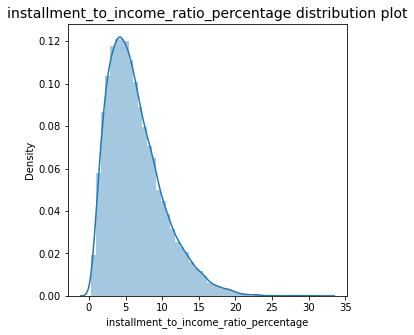

In [35]:
#display installment_to_income_ratio_percentage distribution
plt.subplots(figsize=(5,5))
plt.subplot(1, 1, 1)
ax1=sns.distplot(df["installment_to_income_ratio_percentage"])
ax1.set_title('installment_to_income_ratio_percentage distribution plot', fontsize=14)
ax1.set(xlabel='installment_to_income_ratio_percentage', ylabel='Density')
plt.show()

In [36]:
#display head after data manipulation
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,earliest_cr_line_year,earliest_cr_line_month,default_indicator,installment_to_income_ratio_percentage,loan_amnt_groups,int_rate_groups,annual_inc_groups,installment_to_income_ratio_percentage_groups,dti_groups
0,5000,36 months,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.70,9,0.00,5863.16,5000.00,863.16,0.00,0.00,0.00,171.62,0.00,2011,12,2015.00,1.00,2016.00,5.00,1985,1,0,8.14,Low (4000-7999),Low (8-11.99),Low (20000-39999),Low (8-15.99),Very High (>=24)
2,2400,36 months,15.96,84.33,C,C5,10.00,RENT,12252.00,Not Verified,Fully Paid,small_business,8.72,0,2,2,0,2956,98.50,10,0.00,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.00,2011,12,2014.00,6.00,2016.00,5.00,2001,11,0,8.26,Very Low (<4000),Medium (12-15.99),Very Low (<20000),Low (8-15.99),Low (6-11.99)
3,10000,36 months,13.49,339.31,C,C1,10.00,RENT,49200.00,Source Verified,Fully Paid,other,20.00,0,1,10,0,5598,21.00,37,0.00,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.00,2011,12,2015.00,1.00,2016.00,4.00,1996,2,0,8.28,Medium (8000-11999),Medium (12-15.99),Medium (40000-59999),Low (8-15.99),High (18-23.99)
5,5000,36 months,7.90,156.46,A,A4,3.00,RENT,36000.00,Source Verified,Fully Paid,wedding,11.20,0,3,9,0,7963,28.30,12,0.00,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.00,2011,12,2015.00,1.00,2016.00,1.00,2004,11,0,5.22,Low (4000-7999),Very Low (0-7.99),Low (20000-39999),Very Low (<8),Low (6-11.99)
6,7000,60 months,15.96,170.08,C,C5,8.00,RENT,47004.00,Not Verified,Fully Paid,debt_consolidation,23.51,0,1,7,0,17726,85.60,11,0.00,10110.84,6985.61,3125.23,0.00,0.00,0.00,1313.76,0.00,2011,12,2016.00,5.00,2016.00,5.00,2005,7,0,4.34,Low (4000-7999),Medium (12-15.99),Medium (40000-59999),Very Low (<8),High (18-23.99)


# Data Analysis - Univariate and Segmented Univariate analysis 

divide df columns into numeric and categoric columns

In [37]:
numerics = ['int16', 'int32', 'int64','float32','float64']
categoric = ['object',"category"]
#get numeric and categoric columns for data analysis
df_visu_numeric = df.select_dtypes(include=numerics)
df_visu_categoric = df.select_dtypes(include = categoric)

In [38]:
#print length of numeric and categoric columns
print("numeric: ",len(df_visu_numeric.columns))
print("categoric: ",len(df_visu_categoric.columns))

numeric:  32
categoric:  12


In [39]:
#display numeric columns
df_visu_numeric.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'issue_d_year', 'issue_d_month', 'last_pymnt_d_year',
       'last_pymnt_d_month', 'last_credit_pull_d_year',
       'last_credit_pull_d_month', 'earliest_cr_line_year',
       'earliest_cr_line_month', 'default_indicator',
       'installment_to_income_ratio_percentage'],
      dtype='object')

In [40]:
#display categoric columns
df_visu_categoric.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'loan_amnt_groups', 'int_rate_groups',
       'annual_inc_groups', 'installment_to_income_ratio_percentage_groups',
       'dti_groups'],
      dtype='object')

Display box plot for each numeric column to analyse Univariate analysis

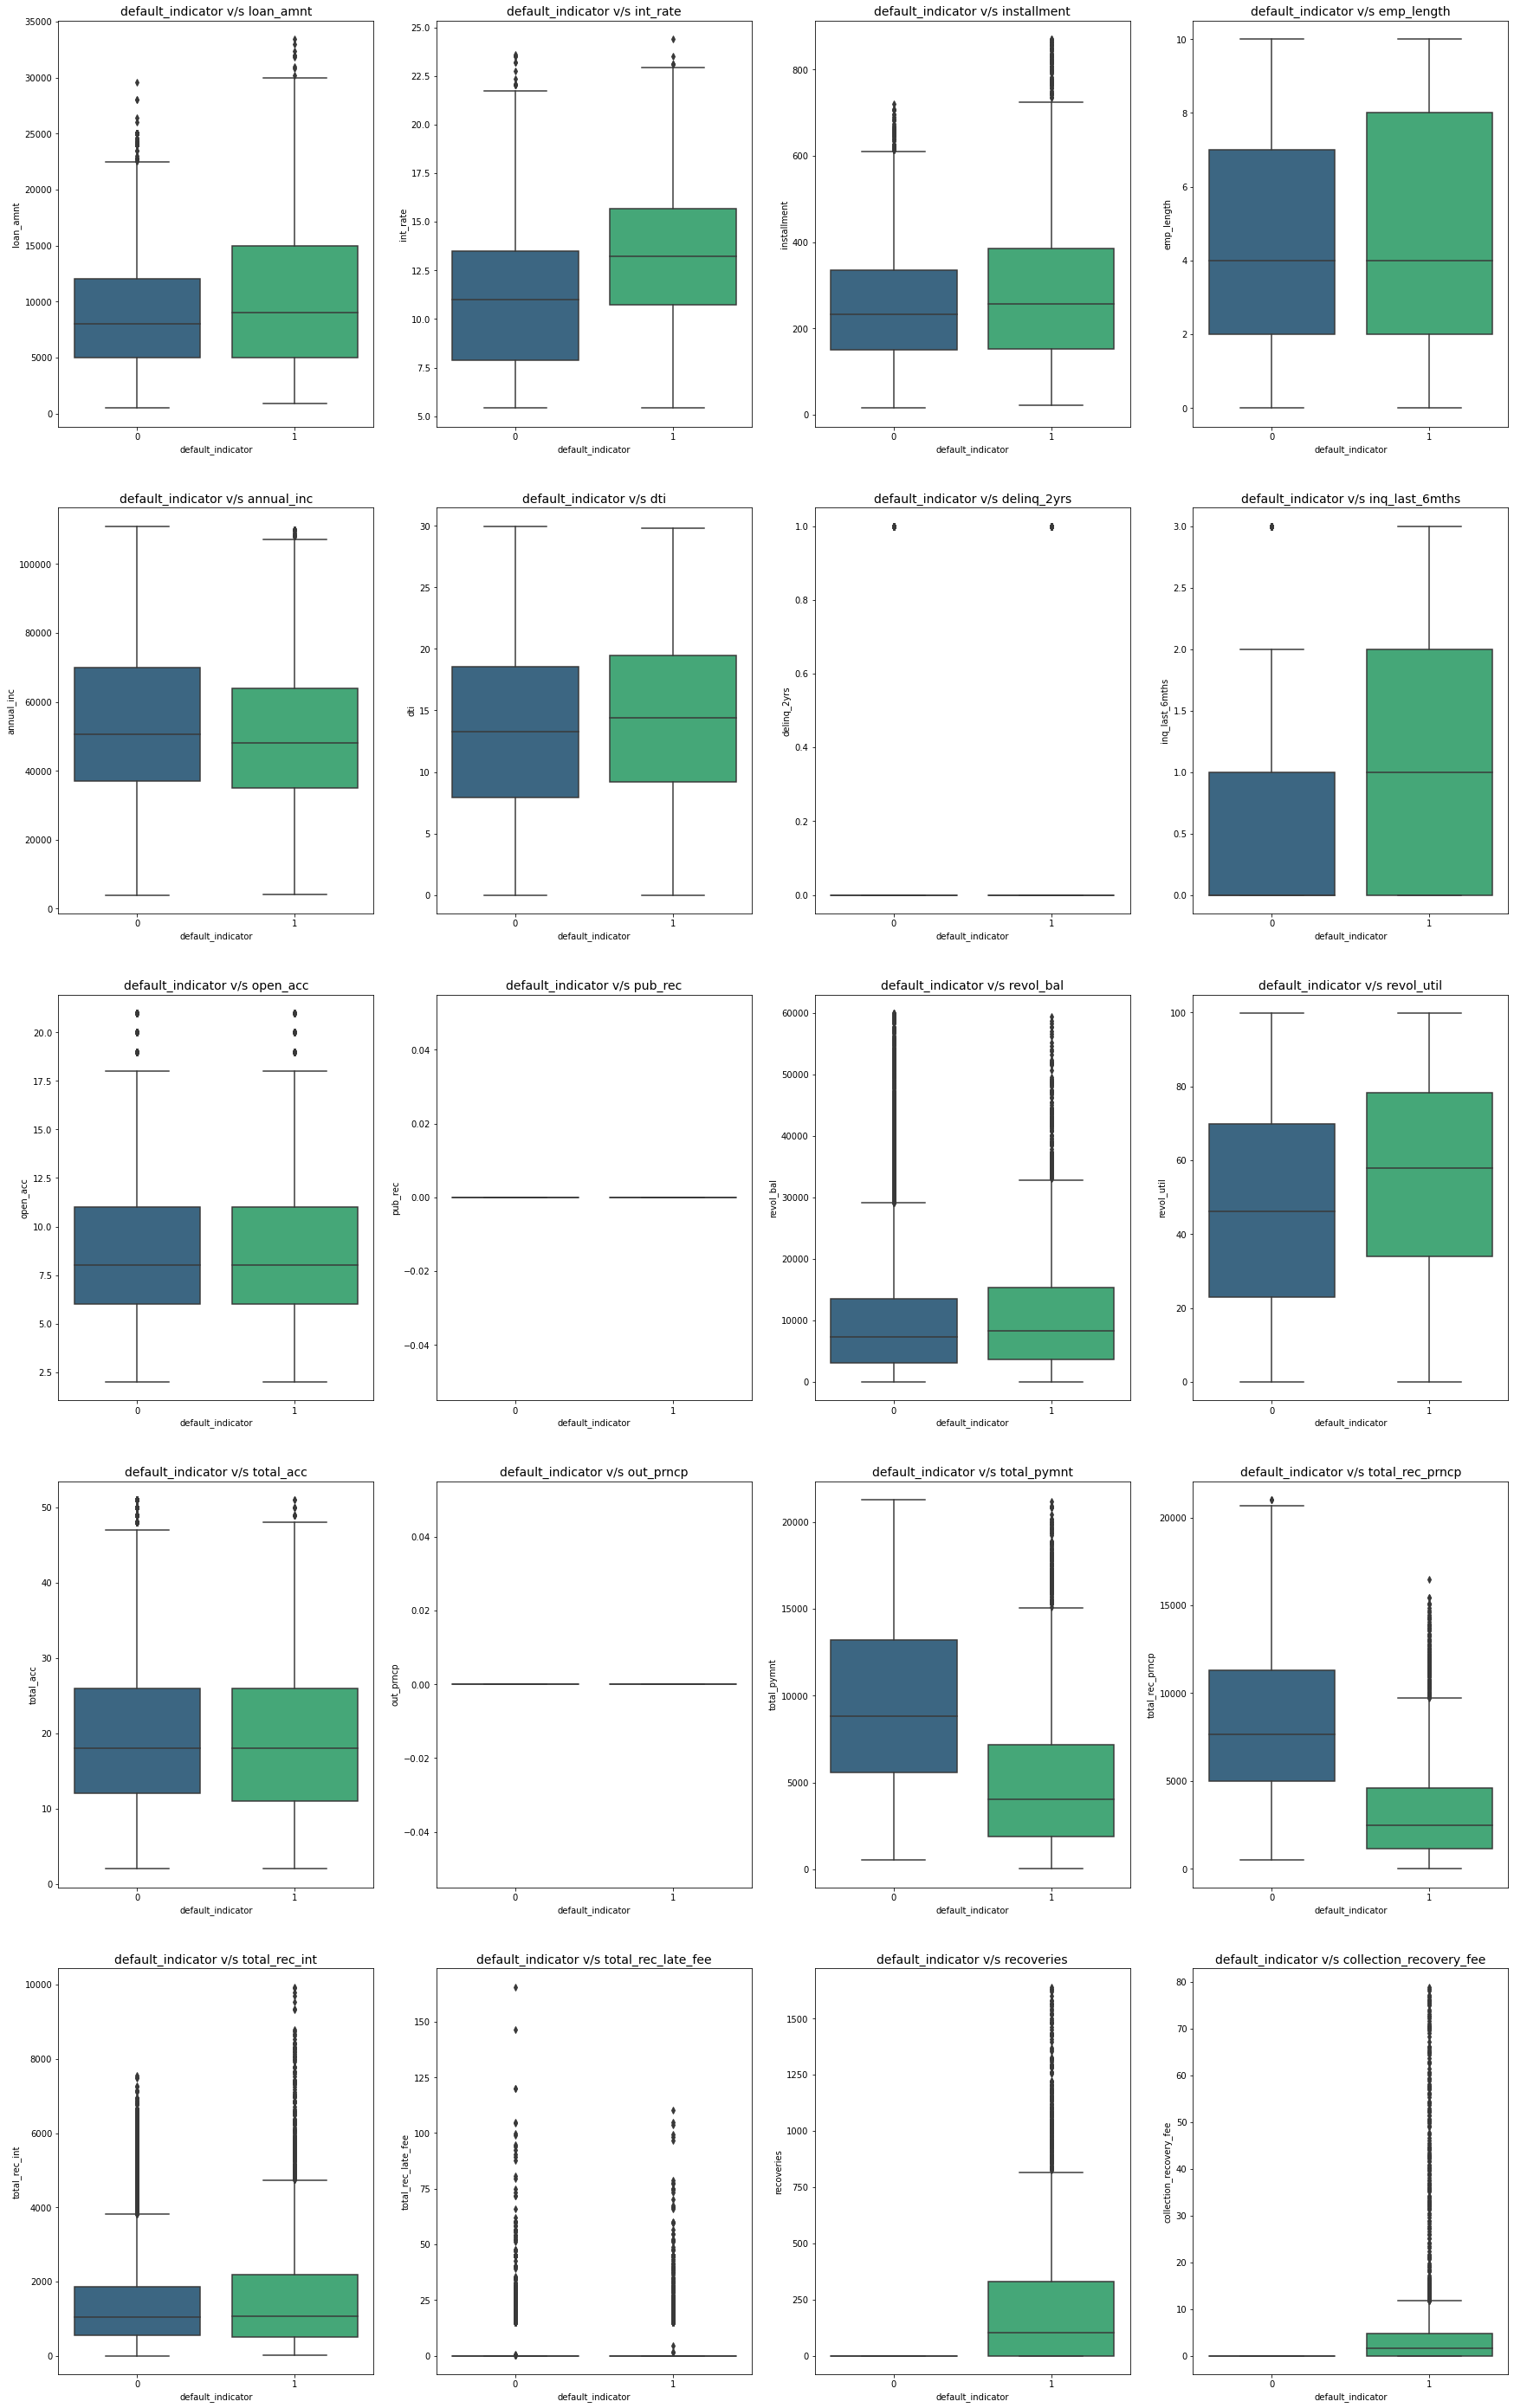

In [41]:
plt.figure(figsize=(30,50))
for i in range(min(20,len(df_visu_numeric.columns))):
    plt.subplot(5,4, i + 1)
    ax=sns.boxplot(y=df_visu_numeric.columns[i], x='default_indicator', data=df,palette = 'viridis')
    ax.set_title('default_indicator v/s '+str(df_visu_numeric.columns[i]), fontsize=14)
plt.show()

Display distribution plot for each numeric column to analyse Univariate analysis

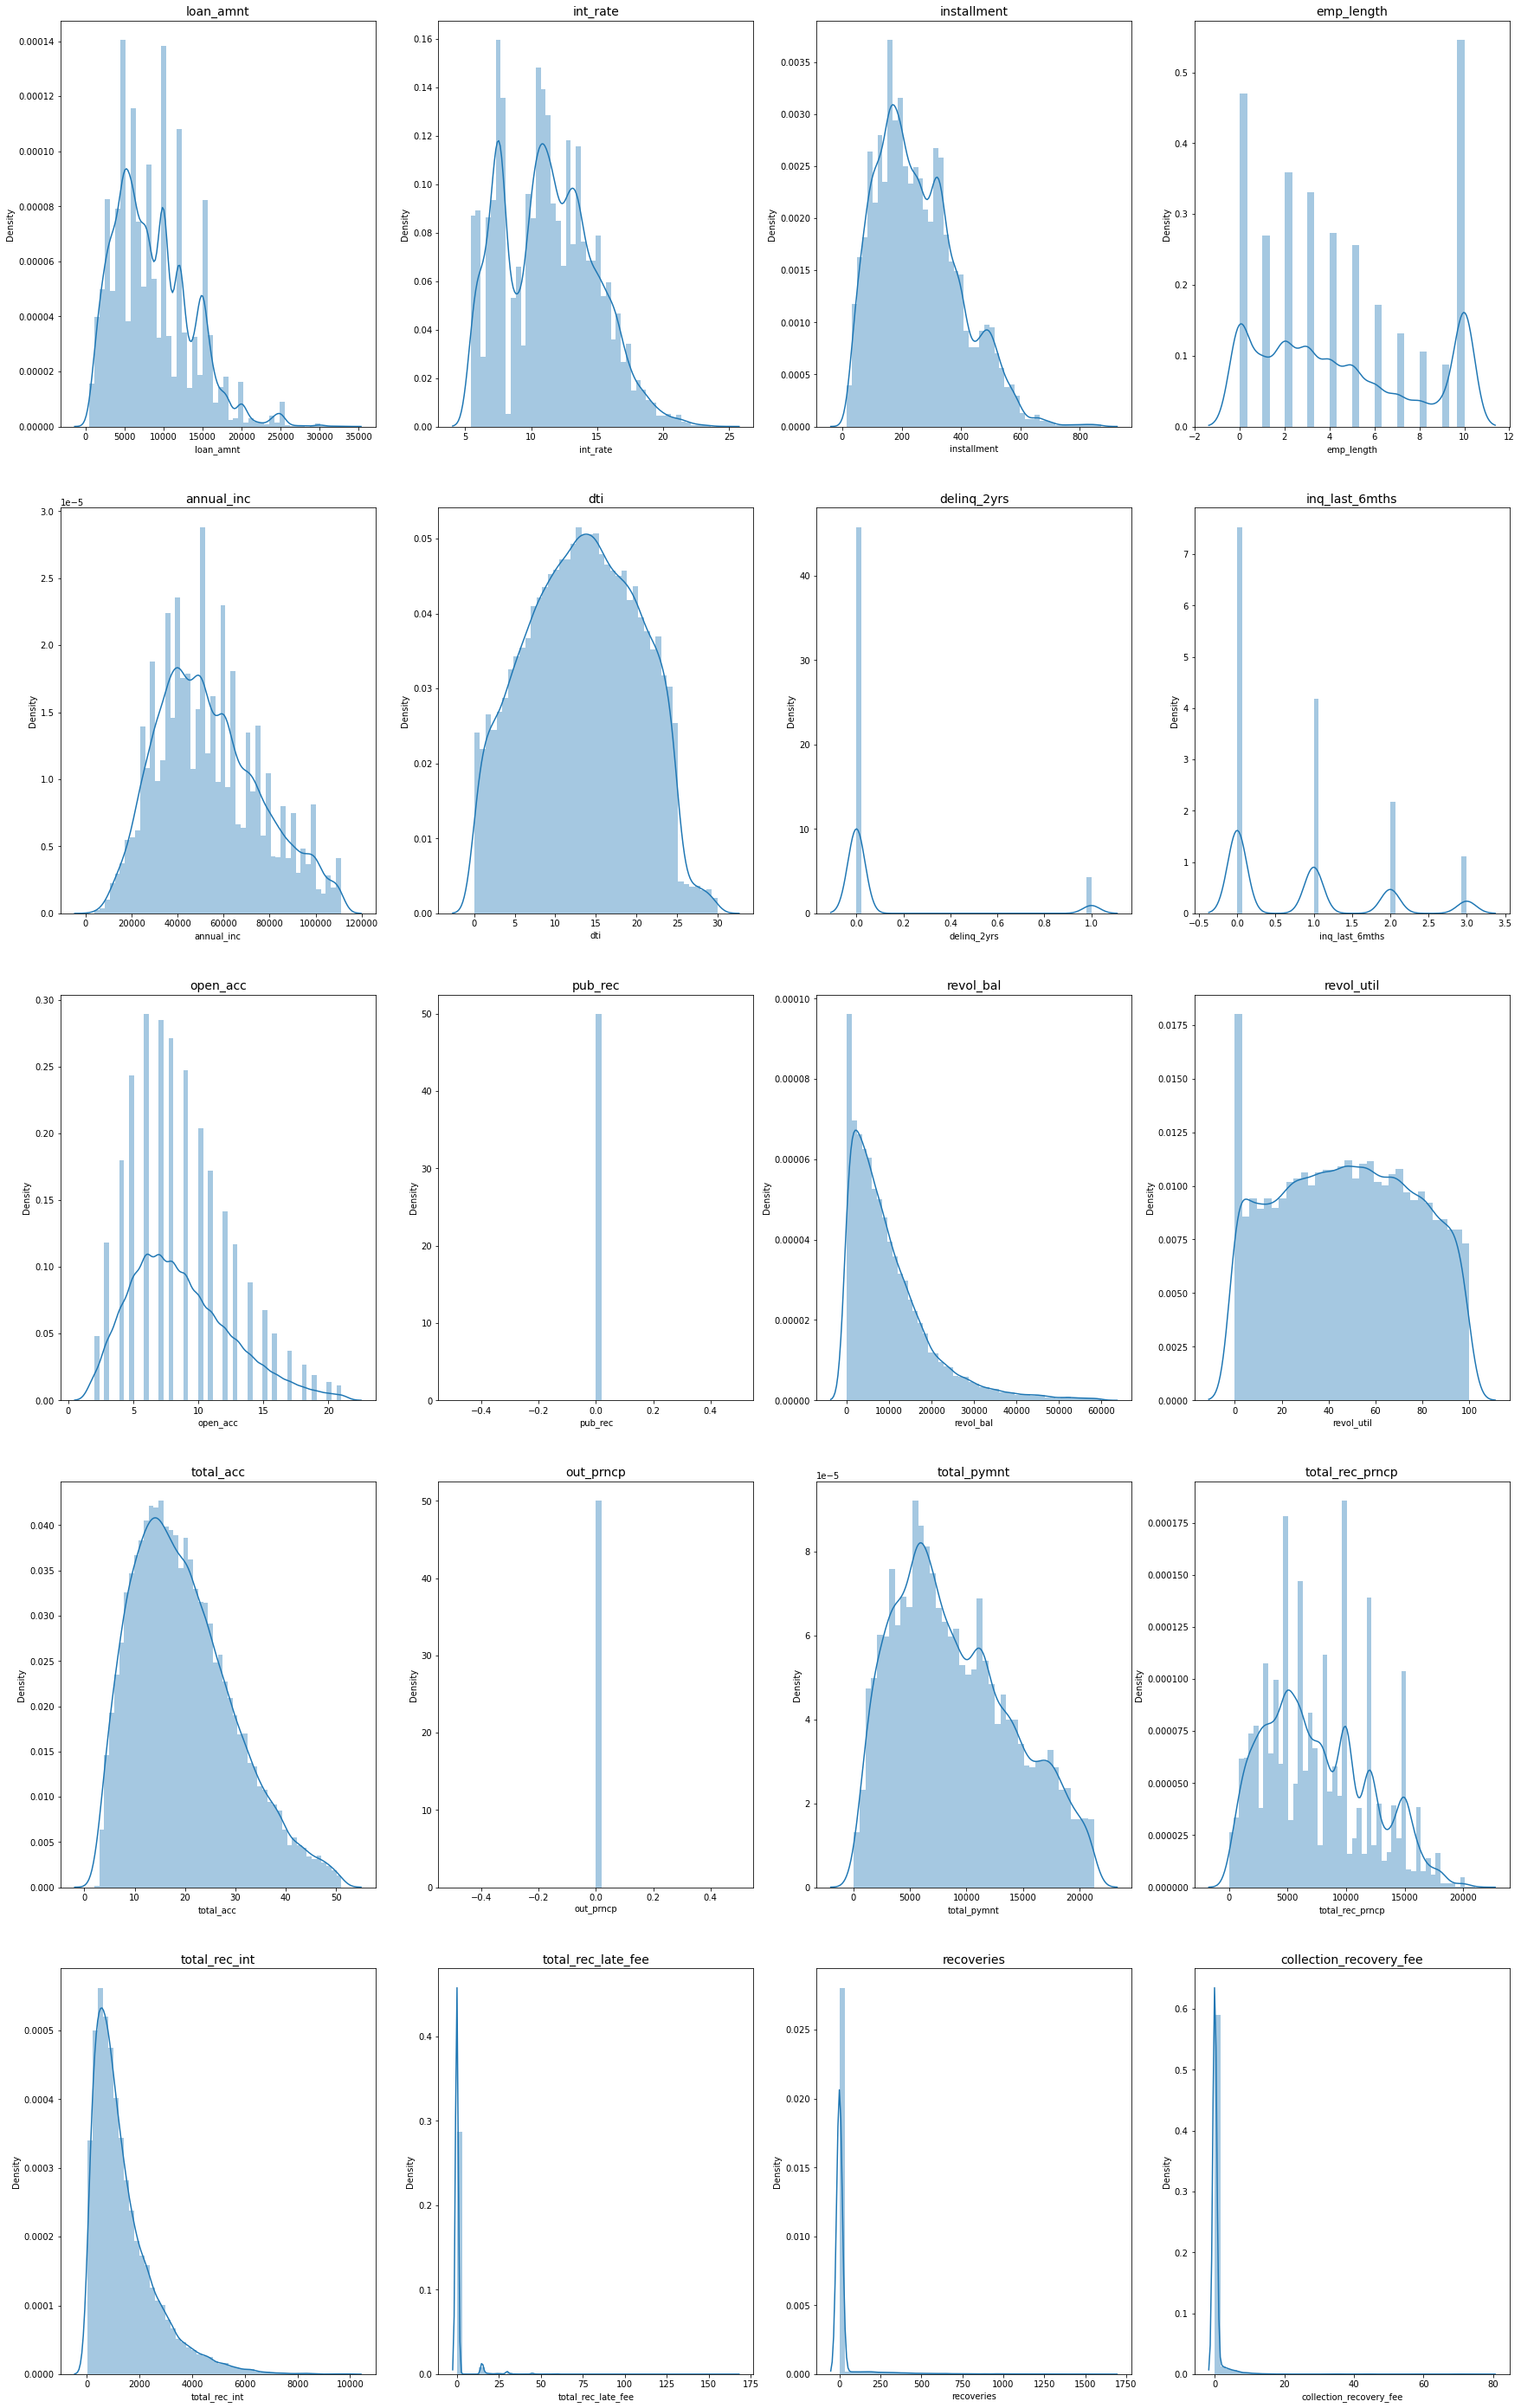

In [42]:
plt.figure(figsize=(30,50))
for i in range(min(20,len(df_visu_numeric.columns))):
    plt.subplot(5,4, i + 1)
    ax=sns.distplot(df[df_visu_numeric.columns[i]])
    ax.set_title(str(df_visu_numeric.columns[i]), fontsize=14)
plt.show()

Display count plot for each categoric column to analyse Univariate analysis

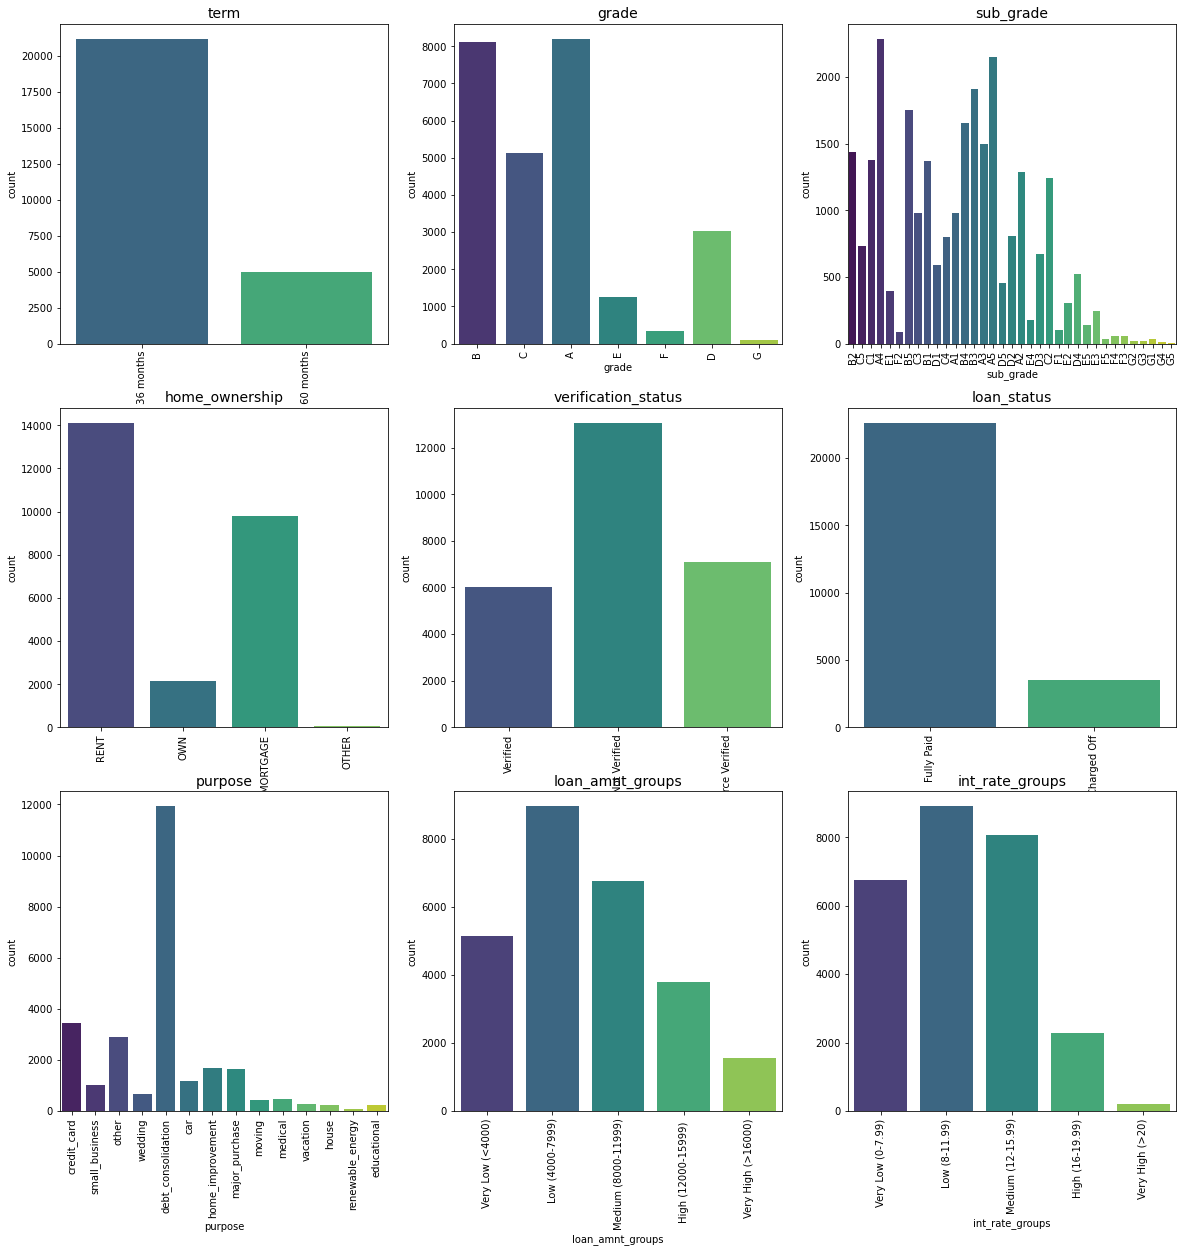

In [43]:
plt.figure(figsize=(20,20))
for i in range(min(9,len(df_visu_categoric.columns))):
    plt.subplot(3,3, i + 1)
    ax=sns.countplot(df[df_visu_categoric.columns[i]],palette = 'viridis')
    ax.set_title(str(df_visu_categoric.columns[i]), fontsize=14)
    plt.xticks(rotation=90)
plt.show()

Dsiplay count plot for each categoric column to analyse segmented univariate analysis

**default_indicator** column

**0: 'Fully Paid',1: 'Charged Off'**

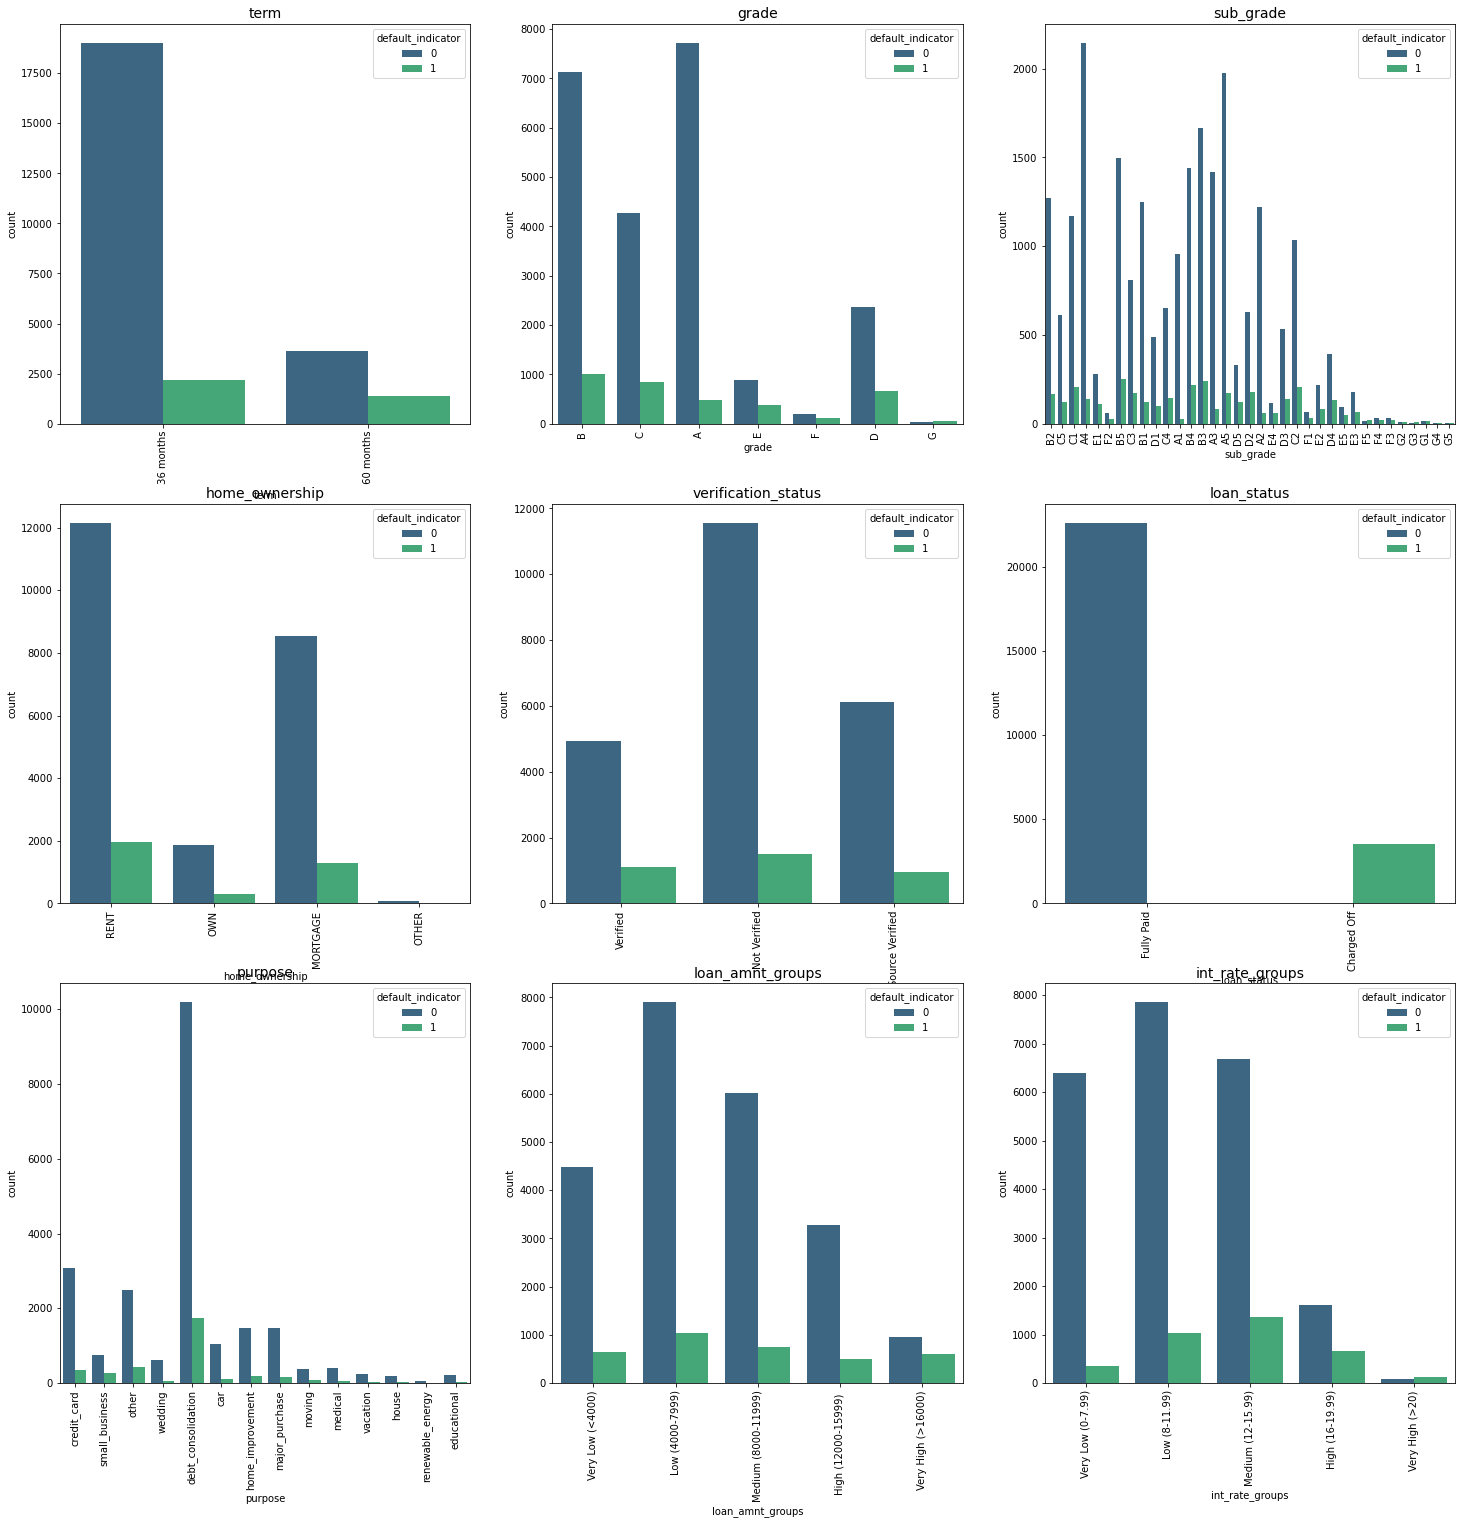

In [44]:
plt.figure(figsize=(25,25))
for i in range(min(9,len(df_visu_categoric.columns))):
    plt.subplot(3,3, i + 1)    
    ax=sns.countplot(x=df[df_visu_categoric.columns[i]], hue="default_indicator", data=df,palette = 'viridis')
    ax.set_title(str(df_visu_categoric.columns[i]), fontsize=14)
    plt.xticks(rotation=90)
plt.show()

Dsiplay bar plot for each categoric column to analyse segmented univariate analysis

**default_indicator** column

**0: 'Fully Paid',1: 'Charged Off'**

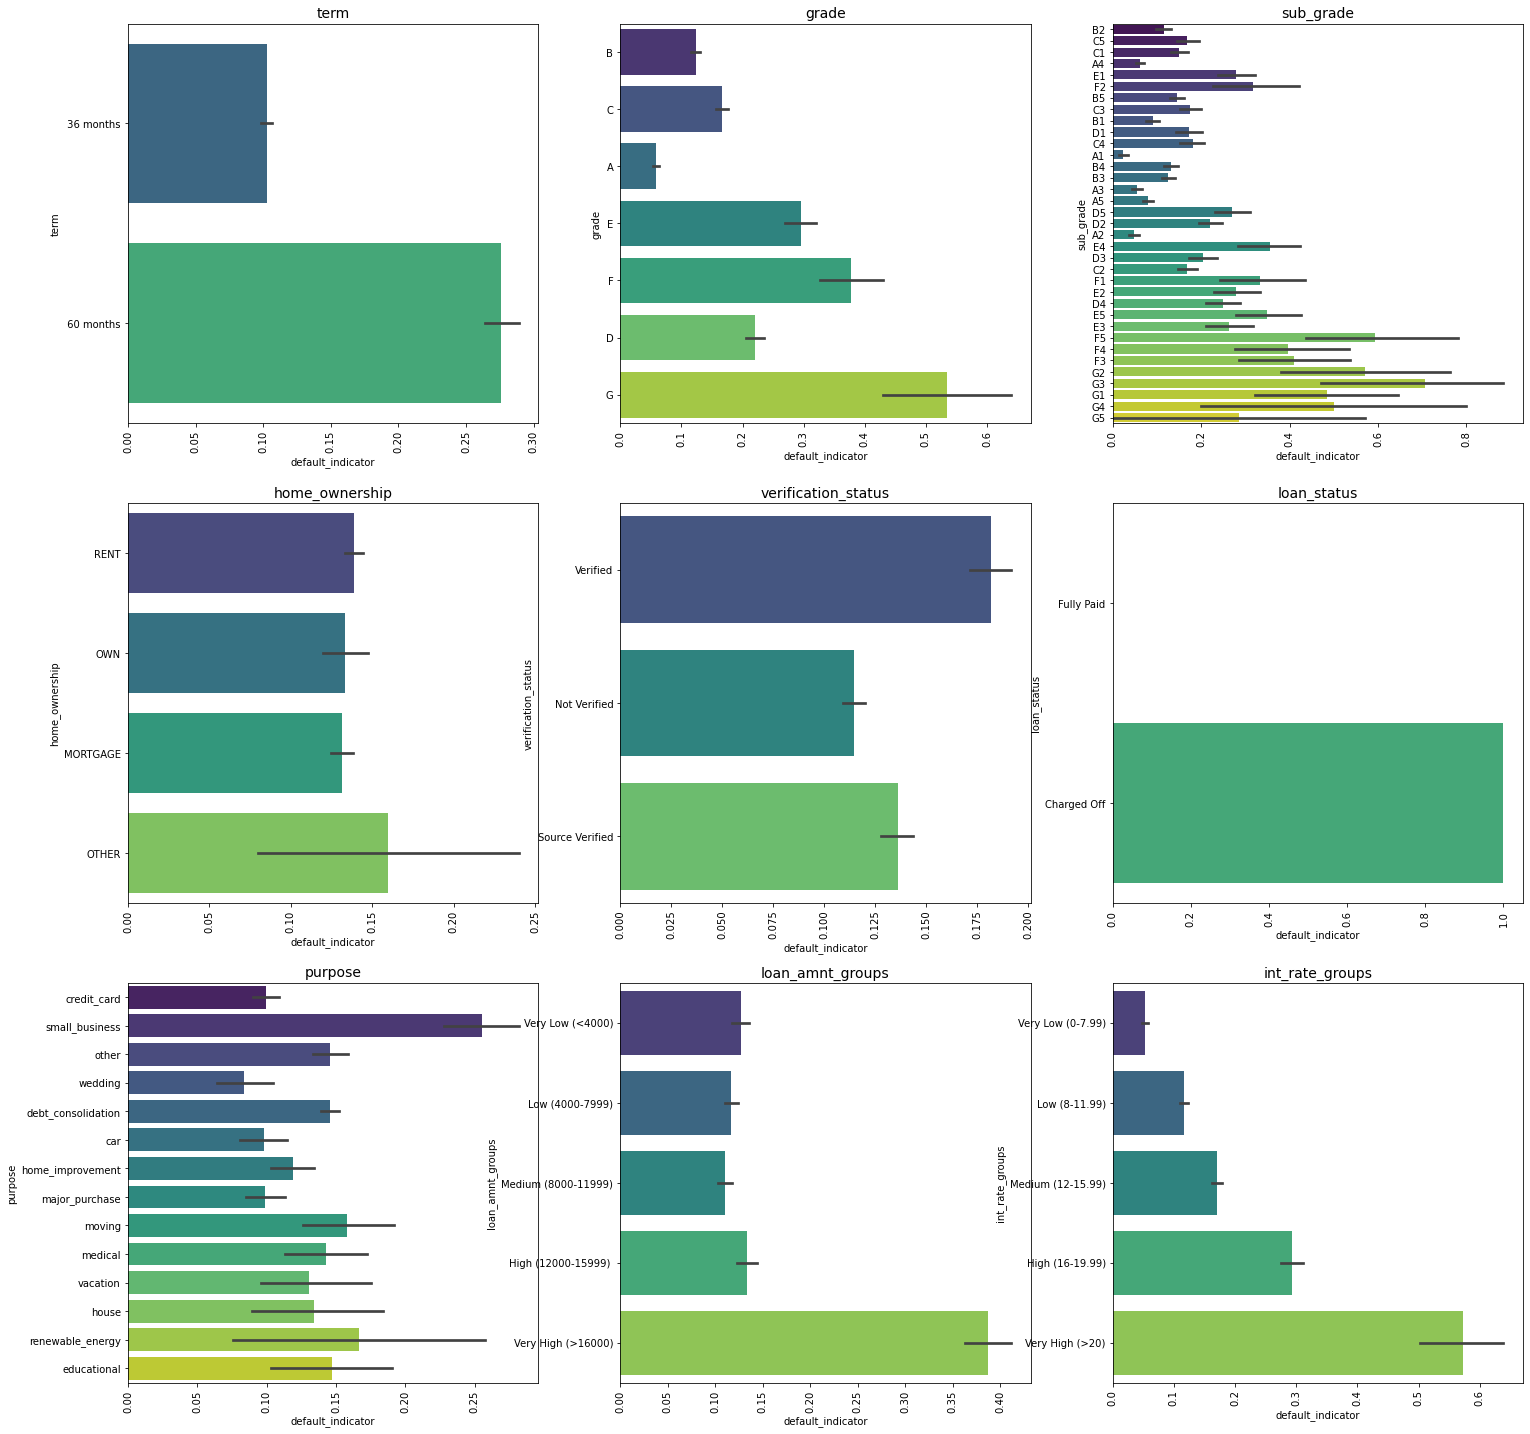

In [45]:
plt.figure(figsize=(25,25))
for i in range(min(9,len(df_visu_categoric.columns))):
    plt.subplot(3,3, i + 1)        
    ax=sns.barplot(data = df, y=df[df_visu_categoric.columns[i]], x="default_indicator",palette = 'viridis')
    ax.set_title(str(df_visu_categoric.columns[i]), fontsize=14)
    plt.xticks(rotation=90)
plt.show()

Dsiplay bar plot for few continuous column to analyse segmented univariate analysis

**default_indicator** column

**0: 'Fully Paid',1: 'Charged Off'**

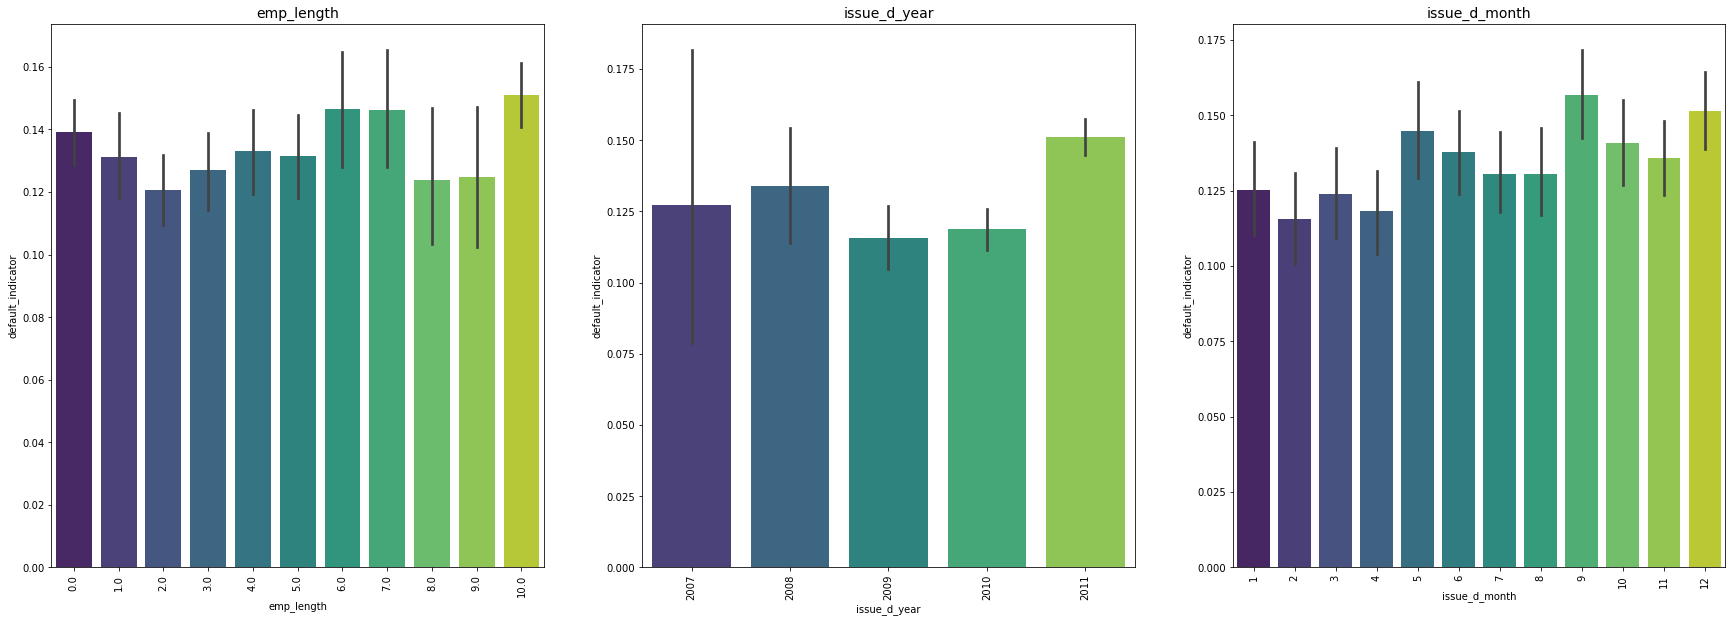

In [46]:
df_continuos_updated = df[["emp_length","issue_d_year","issue_d_month"]]
plt.figure(figsize=(30,10))
for i in range(min(3,len(df_continuos_updated.columns))):
    plt.subplot(1,3, i + 1)        
    ax=sns.barplot(data = df, x=df[df_continuos_updated.columns[i]], y="default_indicator",palette = 'viridis')
    ax.set_title(str(df_continuos_updated.columns[i]), fontsize=14)
    plt.xticks(rotation=90)
plt.show()

<h2> Observations from Univariate and Segmented Univariate Analysis </h2>


From the **Univariate Analysis and Segmented Univariate Analysis** on the data following observations can be noted:  


- The decreasing **grade** (with G being lowest), the rate of Write off keeps on increasing.


- Background check **Verification_status** doesn't impact much. Surprisingly, the verified person is more prone to getting Charged Off.


- With increase in repayment **term** period, the tendency to get Charged Off increases. In case of 60 months term the rate of default is much more than that off 36 months.


- **Home-ownership**, doesn't impact much on loan status, home ownership status as OTHER is more prone to getting charged off.



- Higher the **Interest Rate**, higher is the chance of defaulting.



- Higher default rate is seen in **loan amounts** above 16000.


- If **purpose** of the loan is small business or renewable energy, higher is the chance of defaulting.


- Interestingly the loans taken in the **month** of September and December show a much higher chance of getting Charged Off.






# Data Analysis -  Bi Variate Analysis

In [47]:
#display columns
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'pub_rec_bankruptcies', 'issue_d_year',
       'issue_d_month', 'last_pymnt_d_year', 'last_pymnt_d_month',
       'last_credit_pull_d_year', 'last_credit_pull_d_month',
       'earliest_cr_line_year', 'earliest_cr_line_month', 'default_indicator',
       'installment_to_income_ratio_percentage', 'loan_amnt_groups',
       'int_rate_groups', 'annual_inc_groups',
       'installment_to_income_ratio_percentage_groups', 'dti_groups'],
      dtype='object')

In [48]:
#defining a function for carrying out heatmap between the categorical data
def Bi_Cat (*, data=df, x, y, title=None, figsize=(8,6), cmap='viridis'):
    fig, ax = plt.subplots(figsize=figsize)
    data = pd.pivot_table(data=data, values='default_indicator', index=y, columns=x)
    sns.heatmap(data, ax=ax, annot=True, cmap=cmap)
    if title is not None:
        plt.title(title)
    plt.show()

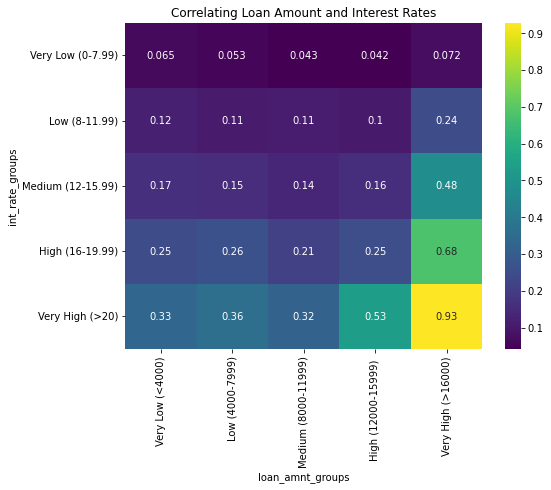

In [49]:
#dsiplay Correlating Loan Amount groups v/s Interest Rates groups
Bi_Cat(x="loan_amnt_groups", y="int_rate_groups", cmap='viridis',title="Correlating Loan Amount and Interest Rates",)

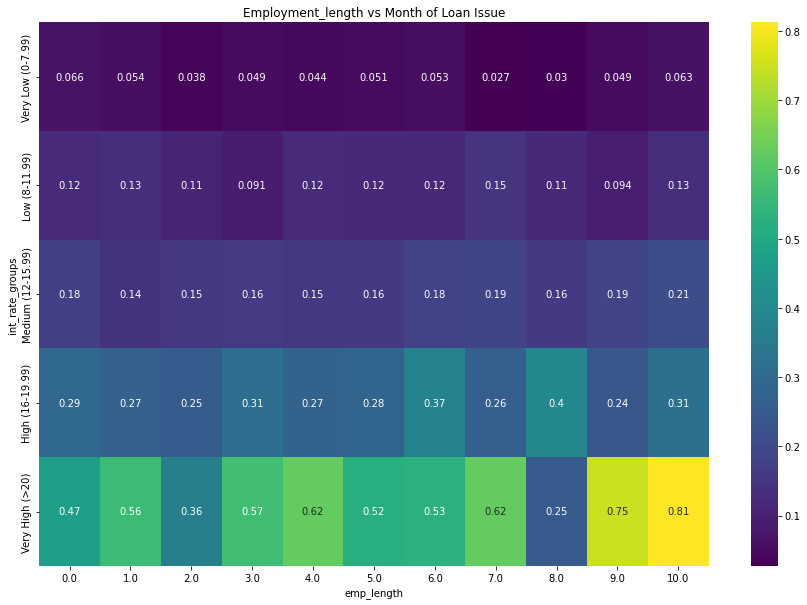

In [50]:
#display correlation between Employment_length vs int_rate_groups
Bi_Cat(x="emp_length", y="int_rate_groups", cmap='viridis', figsize=(15,10), title="Employment_length vs Month of Loan Issue")

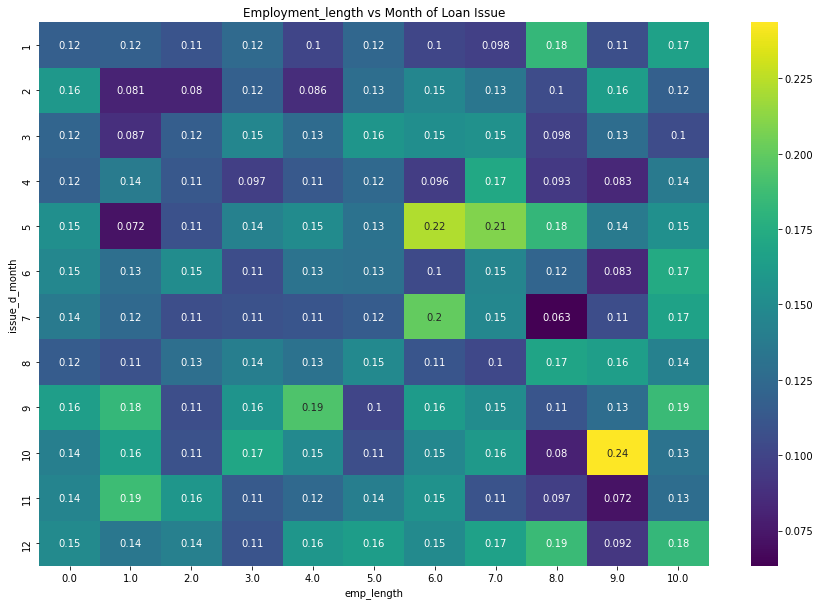

In [51]:
#display correlation between Employment_length vs Month of Loan Issue
Bi_Cat(x="emp_length", y="issue_d_month", cmap='viridis', figsize=(15,10), title="Employment_length vs Month of Loan Issue")

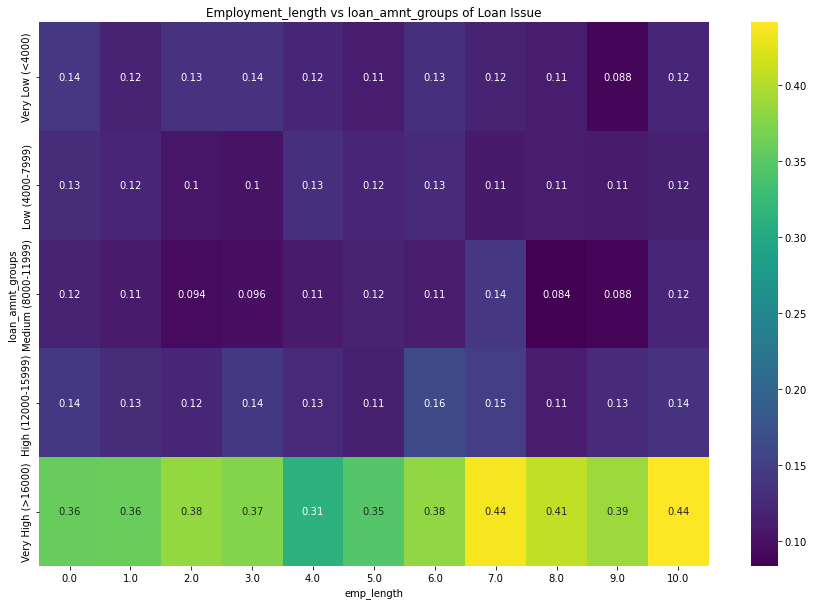

In [52]:
#display correlation between Employment_length vs loan_amnt_groups
Bi_Cat(x="emp_length", y="loan_amnt_groups", cmap='viridis', figsize=(15,10), title="Employment_length vs loan_amnt_groups of Loan Issue")

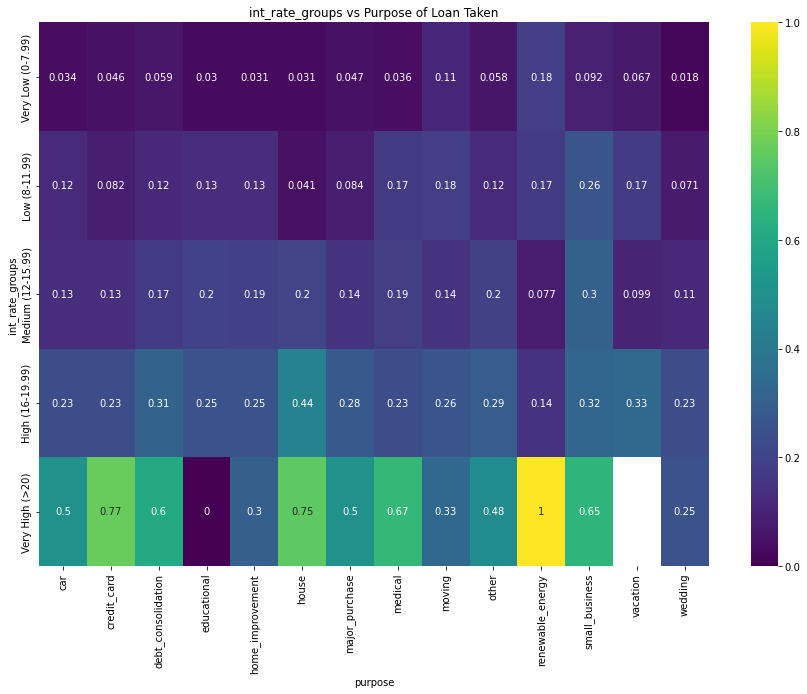

In [53]:
#display correlation between purpose vs int_rate_groups
Bi_Cat(x="purpose", y="int_rate_groups", cmap='viridis', figsize=(15,10), title="int_rate_groups vs Purpose of Loan Taken")

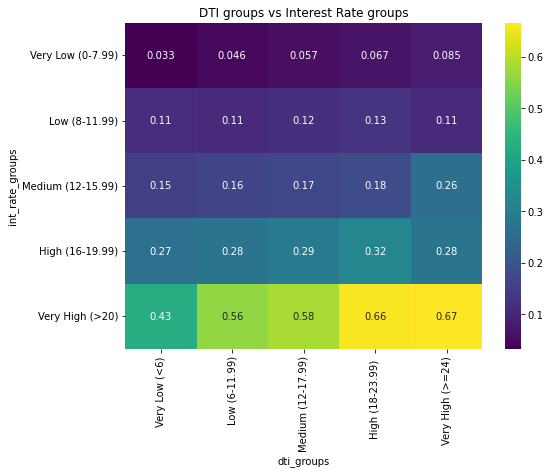

In [54]:
#Display correlation between dti groups vs Interest Rate groups
Bi_Cat(x="dti_groups", y="int_rate_groups", cmap='viridis', title="DTI groups vs Interest Rate groups")

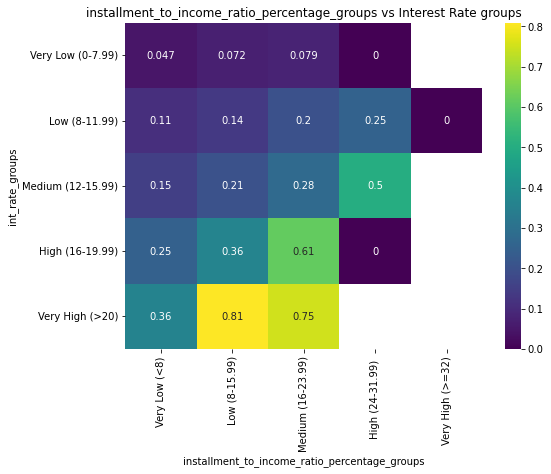

In [55]:
#Dsiplay correlation between installment_to_income_ratio_percentage_groups vs Interest Rate groups
Bi_Cat(x="installment_to_income_ratio_percentage_groups", y="int_rate_groups", cmap='viridis',title="installment_to_income_ratio_percentage_groups vs Interest Rate groups" )

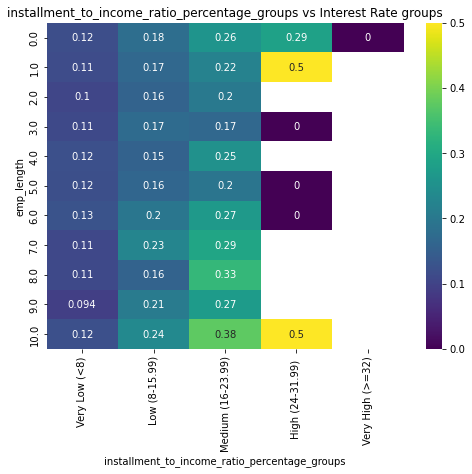

In [56]:
#Dsiplay correlation between installment_to_income_ratio_percentage_groups vs emp_length
Bi_Cat(x="installment_to_income_ratio_percentage_groups", y="emp_length", cmap='viridis',title="installment_to_income_ratio_percentage_groups vs Interest Rate groups" )

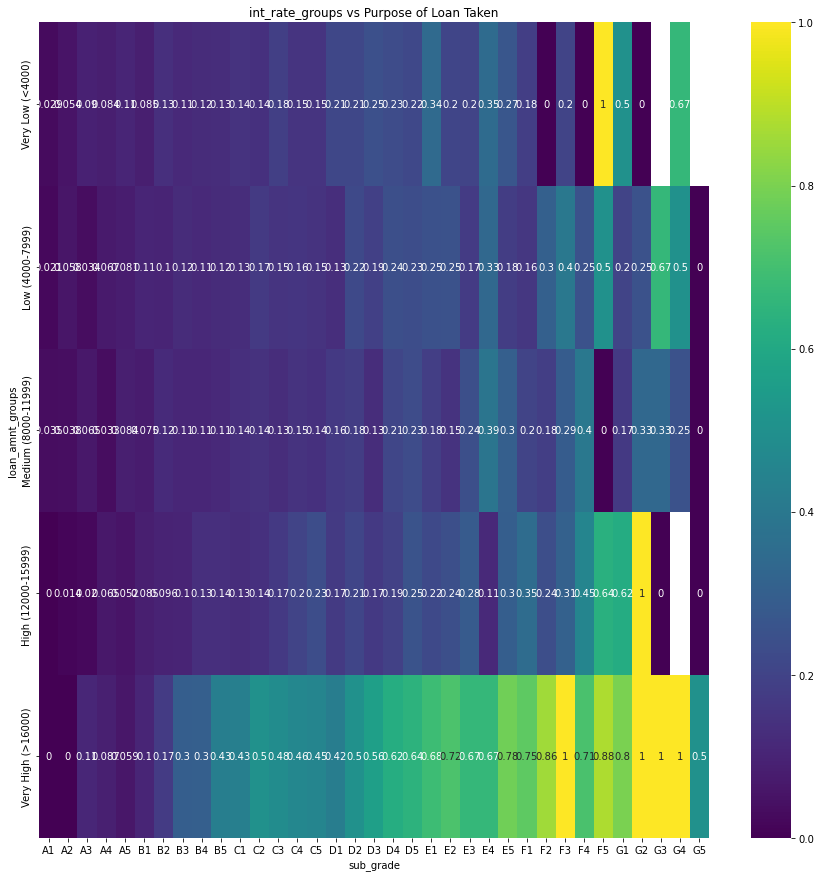

In [57]:
#display correlation between sub_grade vs loan_amnt_groups
Bi_Cat(x="sub_grade", y="loan_amnt_groups", cmap='viridis', figsize=(15,15), title="int_rate_groups vs Purpose of Loan Taken")

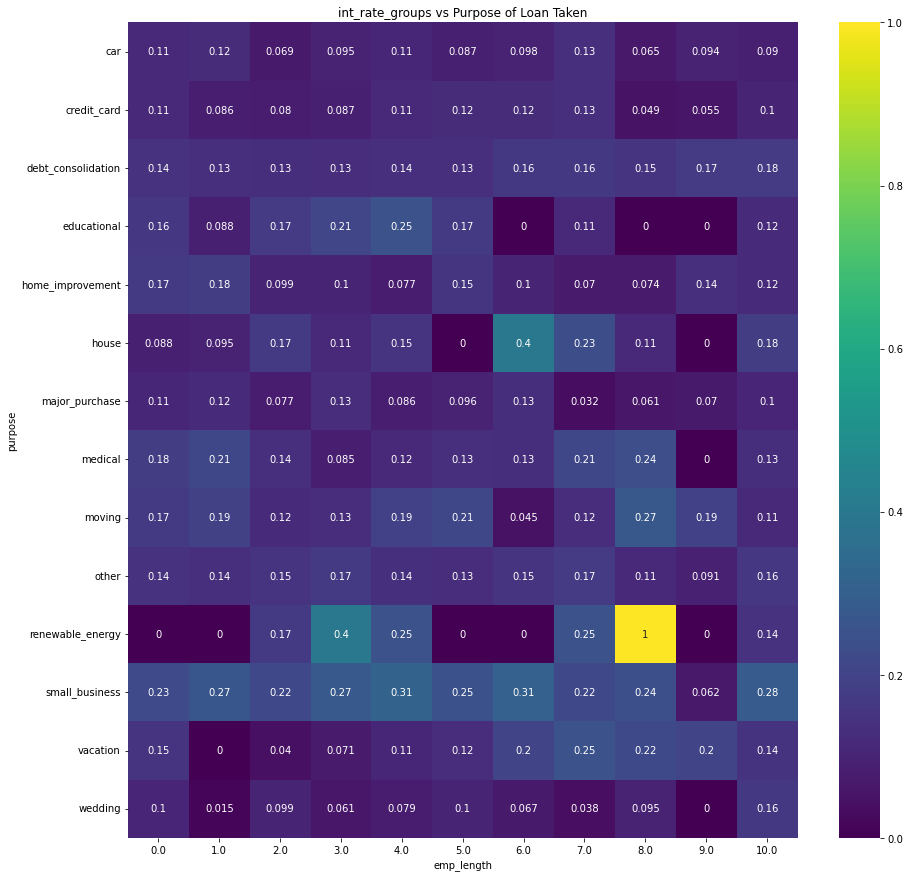

In [58]:
#display correlation between Employment_length vs Purpose of Loan Taken
Bi_Cat(x="emp_length", y="purpose", cmap='viridis', figsize=(15,15), title="int_rate_groups vs Purpose of Loan Taken")

Display barplot to analyse bivariate analysis between few columns

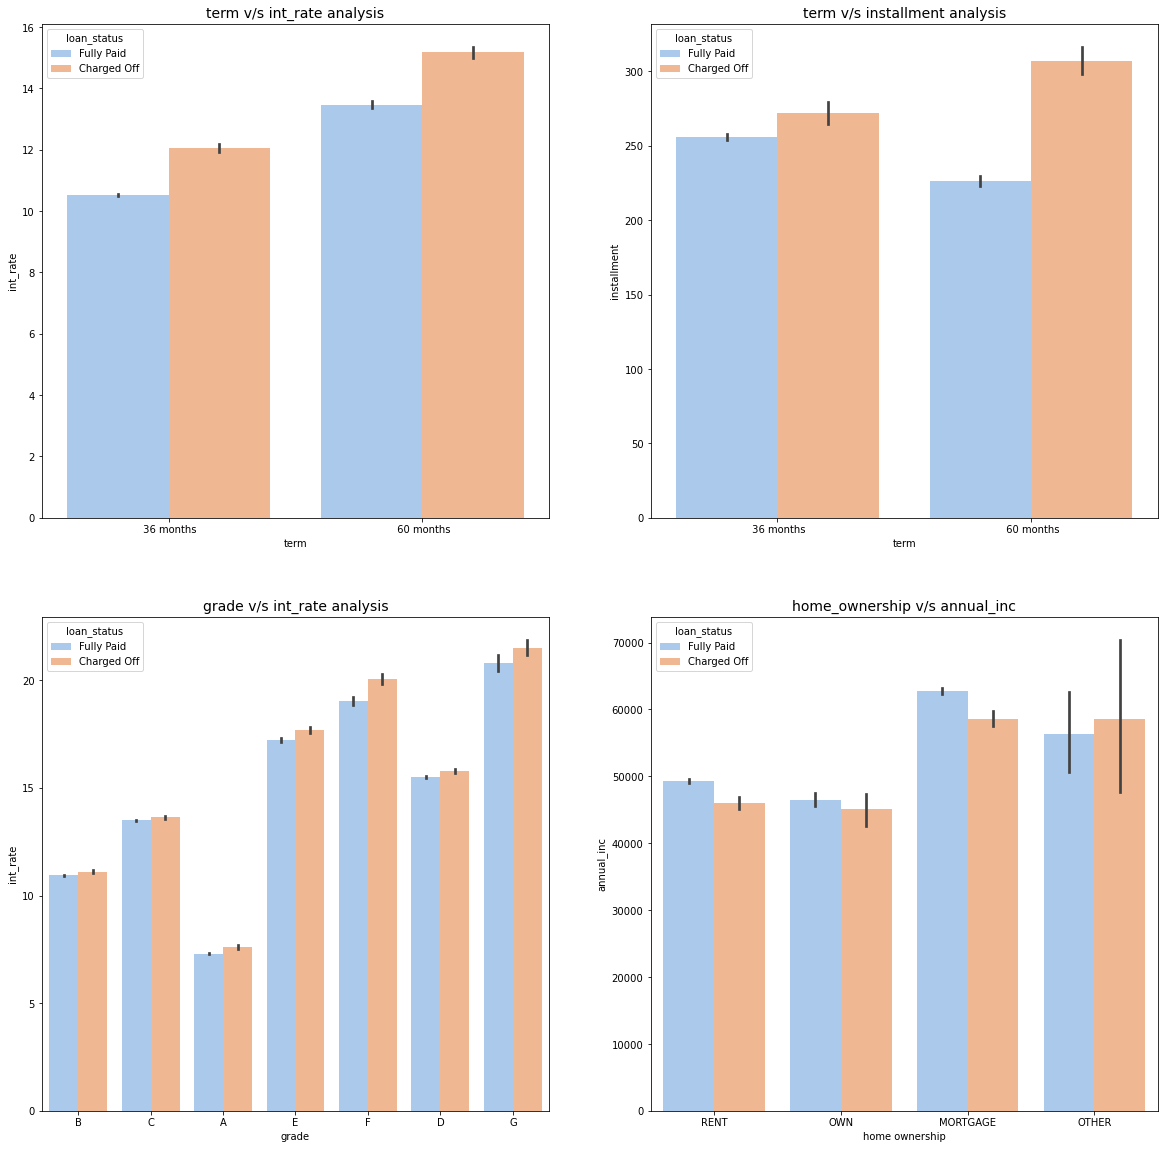

In [59]:
plt.subplots(figsize=(20,20))
plt.subplot(2, 2, 1)
ax1=sns.barplot(data =df,x='term', y='int_rate', hue ='loan_status',palette="pastel")
ax1.set_title('term v/s int_rate analysis', fontsize=14)
ax1.set(xlabel='term', ylabel='int_rate')
plt.subplot(2, 2, 2)
ax1=sns.barplot(data =df,x='term', y='installment', hue ='loan_status',palette="pastel")
ax1.set_title('term v/s installment analysis', fontsize=14)
ax1.set(xlabel='term', ylabel='installment')
plt.subplot(2, 2, 3)
ax1=sns.barplot(data =df,x='grade', y='int_rate', hue ='loan_status',palette="pastel")
ax1.set_title('grade v/s int_rate analysis', fontsize=14)
ax1.set(xlabel='grade', ylabel='int_rate')
plt.subplot(2, 2, 4)
ax1=sns.barplot(data =df,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
ax1.set_title('home_ownership v/s annual_inc', fontsize=14)
ax1.set(xlabel='home ownership', ylabel='annual_inc')
plt.show()

Display boxplot to analyse bivariate analysis between few columns

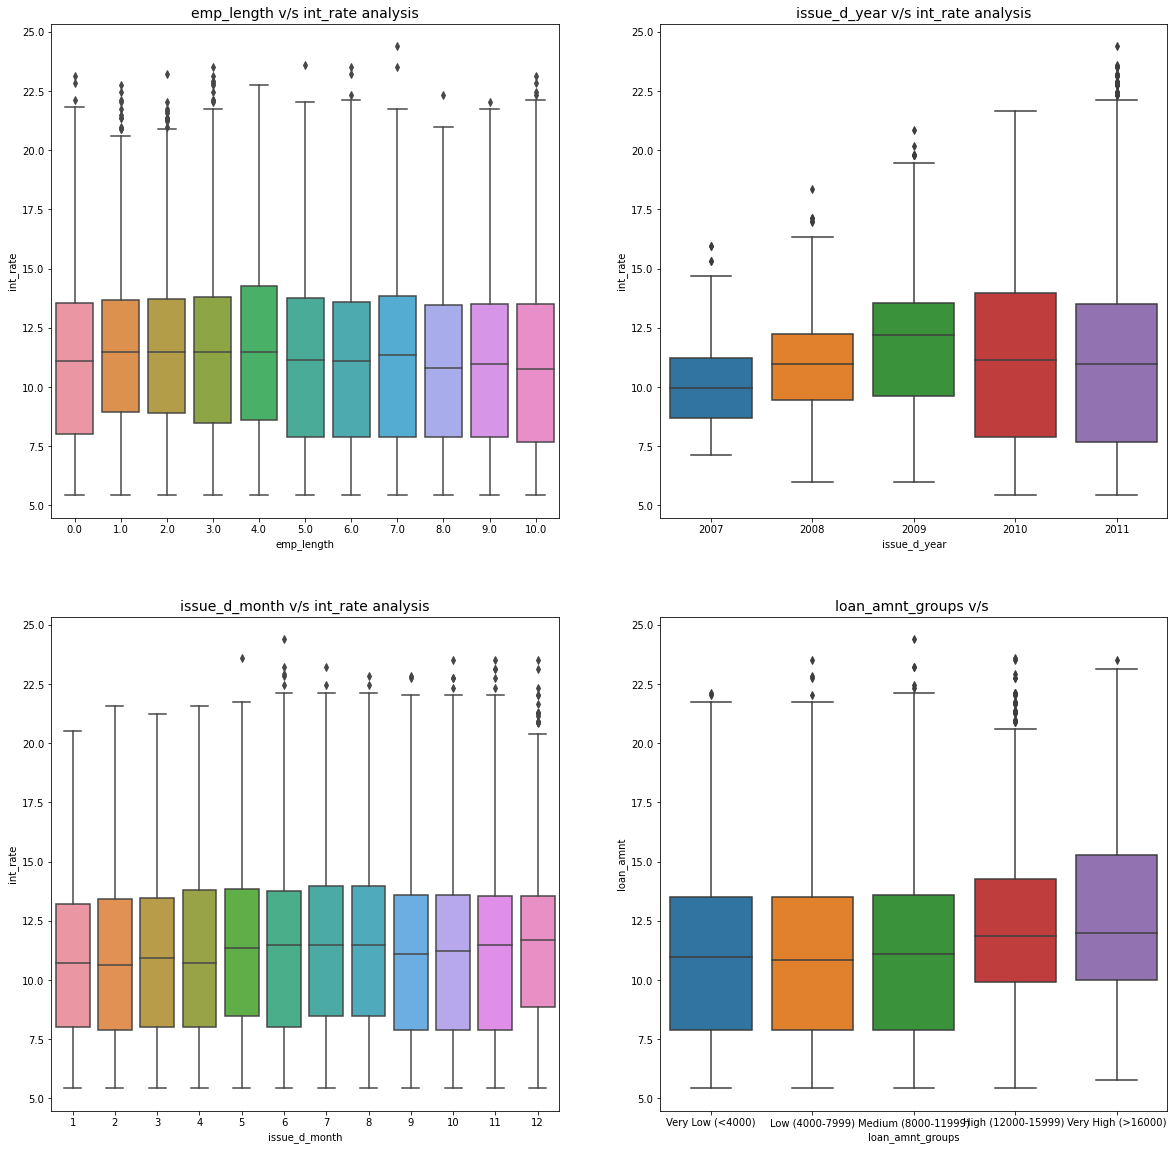

In [60]:
plt.subplots(figsize=(20,20))
plt.subplot(2, 2, 1)
ax1=sns.boxplot(data =df,x='emp_length', y='int_rate')
ax1.set_title('emp_length v/s int_rate analysis', fontsize=14)
ax1.set(xlabel='emp_length', ylabel='int_rate')
plt.subplot(2, 2, 2)
ax1=sns.boxplot(data =df,x='issue_d_year', y='int_rate')
ax1.set_title('issue_d_year v/s int_rate analysis', fontsize=14)
ax1.set(xlabel='issue_d_year', ylabel='int_rate')
plt.subplot(2, 2, 3)
ax1=sns.boxplot(data =df,x='issue_d_month', y='int_rate')
ax1.set_title('issue_d_month v/s int_rate analysis', fontsize=14)
ax1.set(xlabel='issue_d_month', ylabel='int_rate')
plt.subplot(2, 2, 4)
ax1=sns.boxplot(data =df,x='loan_amnt_groups', y='int_rate')
ax1.set_title('loan_amnt_groups v/s ', fontsize=14)
ax1.set(xlabel='loan_amnt_groups', ylabel='loan_amnt')
plt.show()

In [61]:
#display numeric columns
df_visu_numeric.columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies',
       'issue_d_year', 'issue_d_month', 'last_pymnt_d_year',
       'last_pymnt_d_month', 'last_credit_pull_d_year',
       'last_credit_pull_d_month', 'earliest_cr_line_year',
       'earliest_cr_line_month', 'default_indicator',
       'installment_to_income_ratio_percentage'],
      dtype='object')

In [62]:
#display categoric columns
df_visu_categoric.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'loan_amnt_groups', 'int_rate_groups',
       'annual_inc_groups', 'installment_to_income_ratio_percentage_groups',
       'dti_groups'],
      dtype='object')

**Get corrleation plot between following columns: ['loan_amnt','int_rate','installment','emp_length','annual_inc','dti','total_acc','installment_to_income_ratio_percentage','default_indicator' ]**

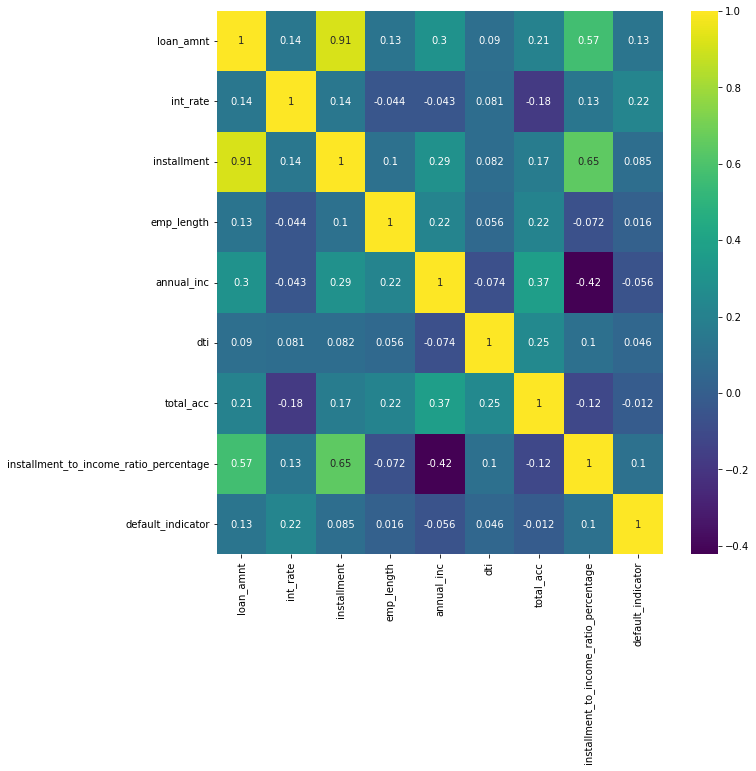

In [63]:
corr = df.loc[:, [ 'loan_amnt','int_rate','installment','emp_length','annual_inc','dti','total_acc','installment_to_income_ratio_percentage','default_indicator']].corr()
plt.figure(figsize = (10,10))
sns.heatmap(corr, annot = True, cmap='viridis')
plt.show()

**Getting correlation between all numeric columns**

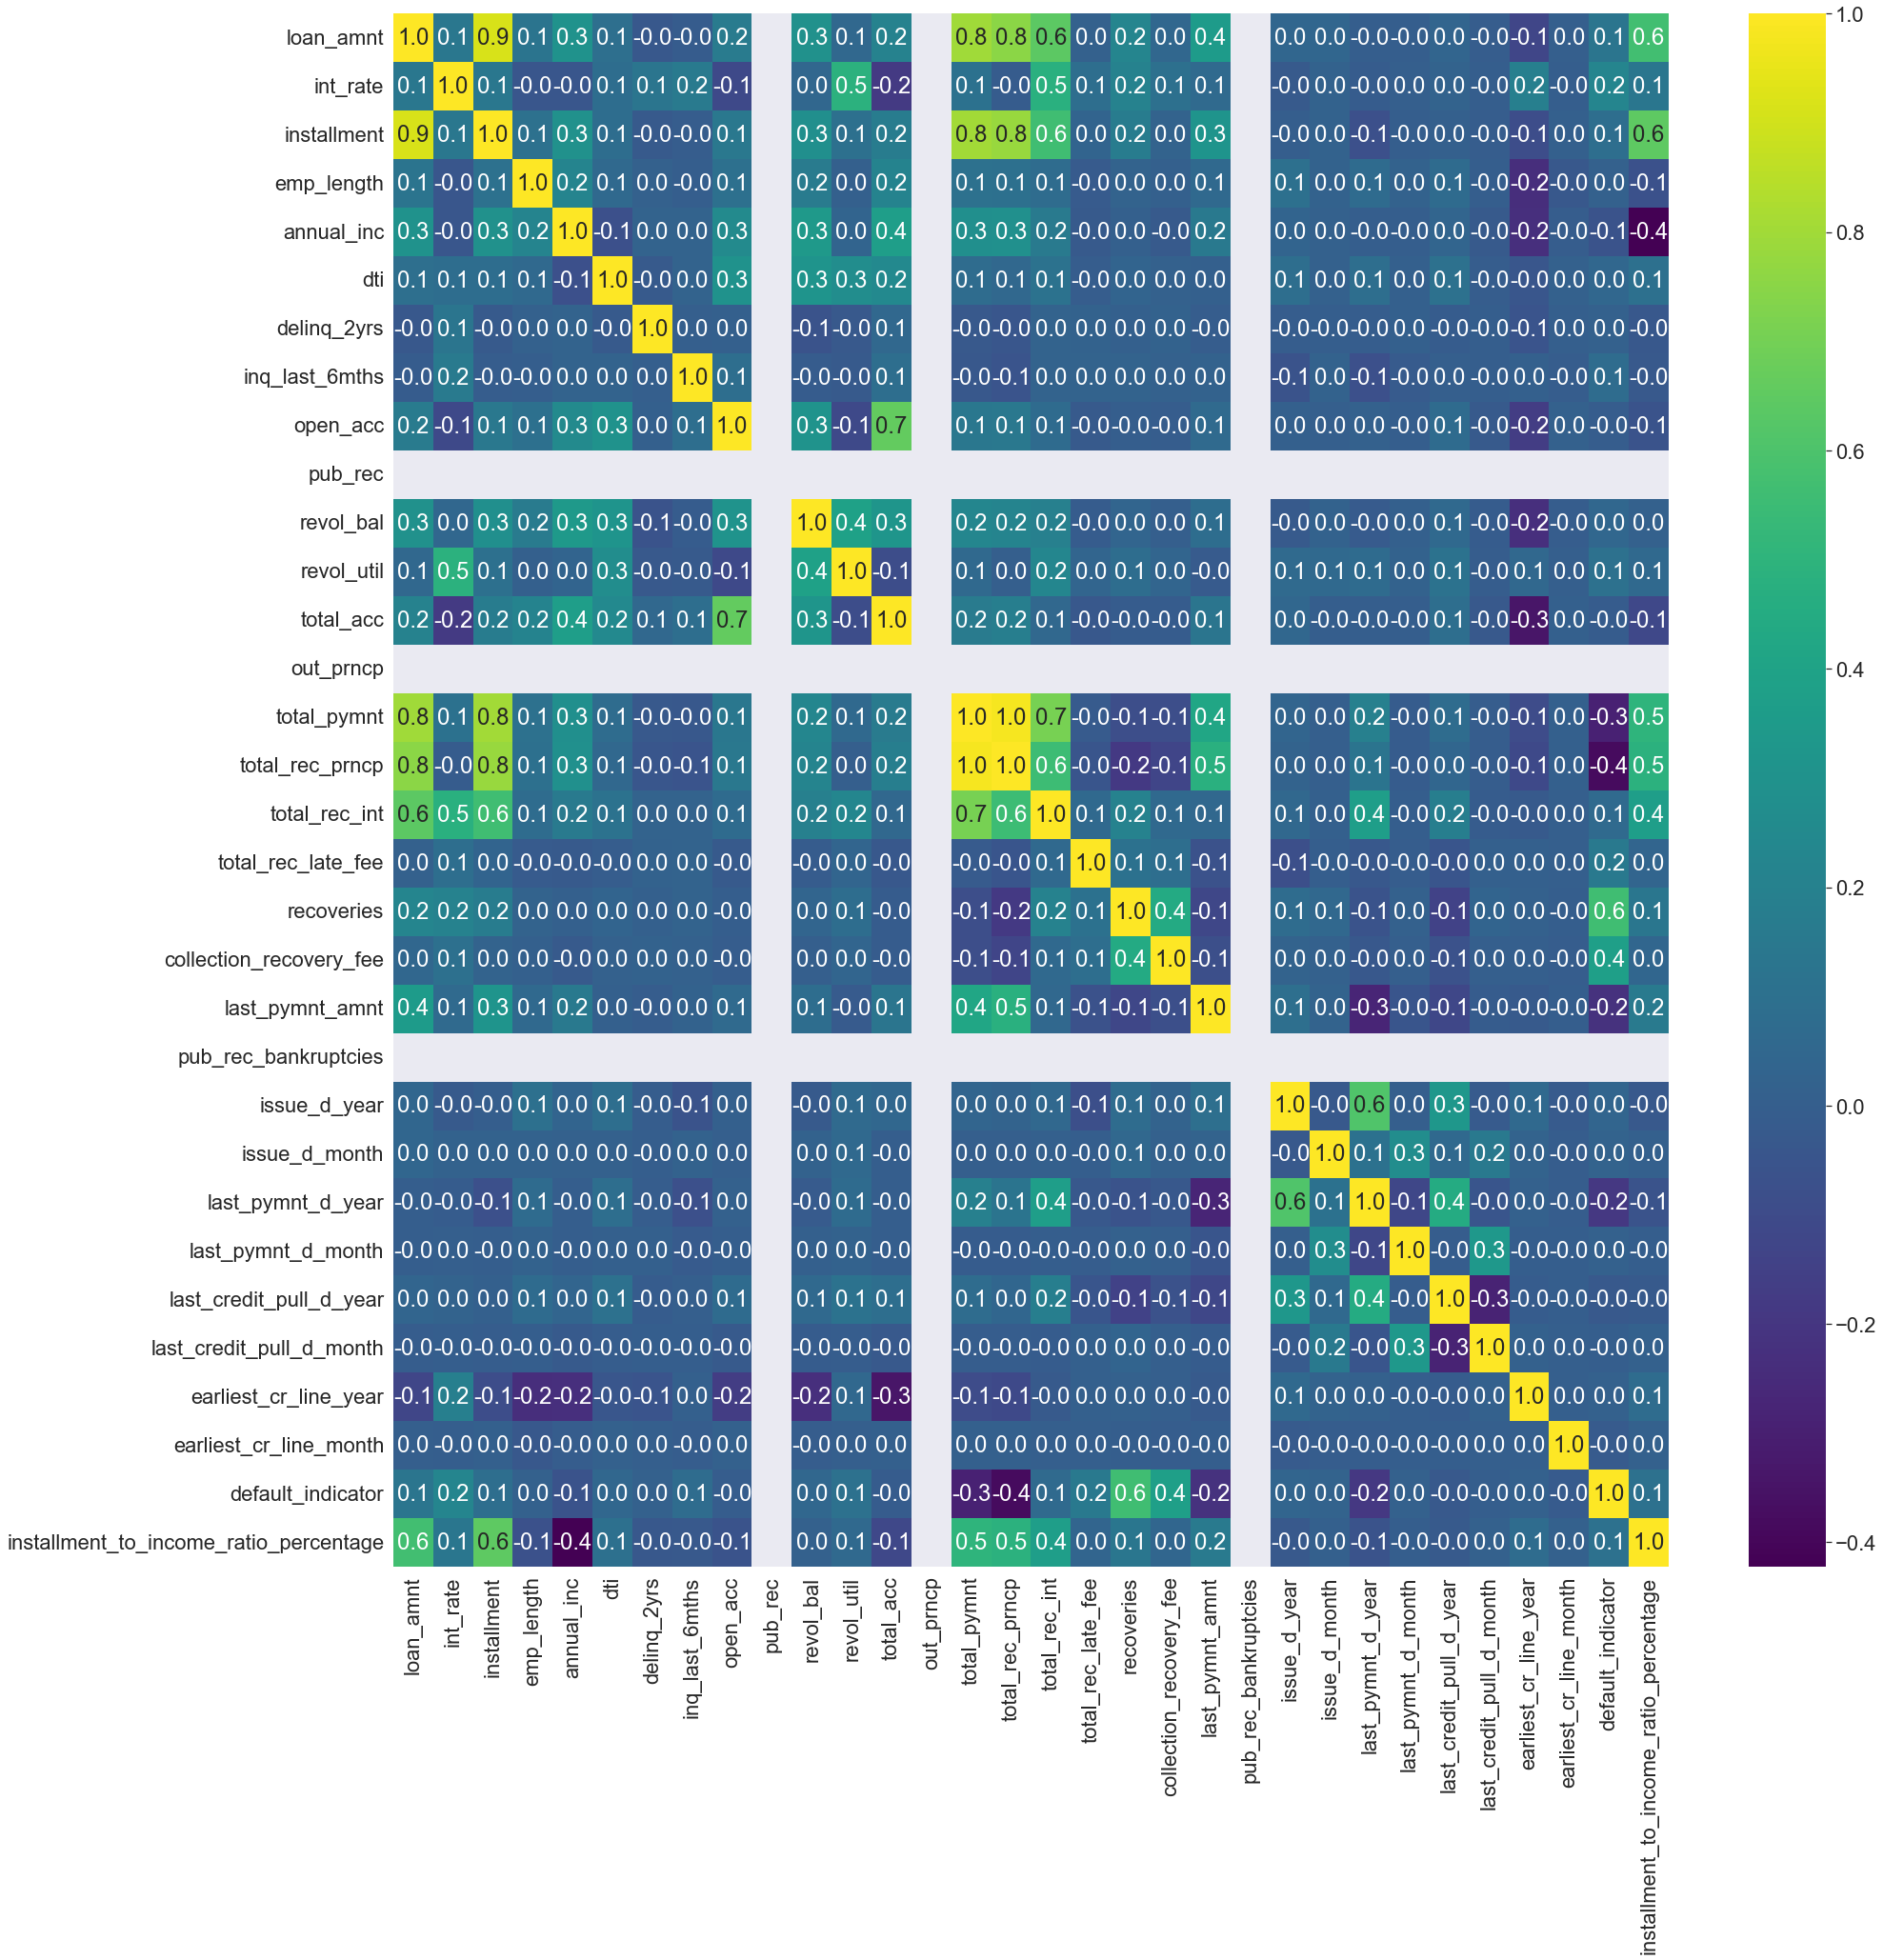

In [69]:
corr = df_visu_numeric.corr()
plt.figure(figsize = (30,30))
sns.set(font_scale=2)
sns.heatmap(corr, cmap='viridis', annot=True, fmt=".1f")

plt.show()

<h2> Observations from Bivariate Analysis </h2>


From the **Bivariate Analysis** on the data following observations can be noted:  


- From Analysis of **Loan Amount** with **Interest Rates**, it is quite evident that very high interest rates come with higher risk of default.And this risk increases for Loan amounts more than 12000.



- While reading **Employment length** with **Month** of Loan, it can be seen that the The default rate of May borrrowers with six and seven years experience are higher then other months. Employees with 9 years of experience and issue month is October have more chances of getting defaulted.


- While investigating relationship of **Employment length** and **Purpose**, it can be noted that the ones with purpose as "renewable energy" and "vacation" are more prone to being "Charged off". 


- In comparing **employment length** to **Installment to Income ratio**, the ones with **very high**  Installment to Income ratio and less experience has a higher chance of being Charged off.

- With higher **Employment Length** and Very High **Interest Rate**, the tendency to default keeps on increasing. The highest chances of default occurs at employment length above 9 years and Very High Interest Rate.


- While analysis **dti groups** with the **Interest rate groups**, it is notable that the combination of higher dti with higher interest rates groups are more tend to getting default.


- In comparing **interest rates** with **Installment to Income ratio**, it can be seen that with increase in interest rate slabs and increasing Installment to Income  ratio, the rate of defaulting increases. The risk becomes highest at the combination of very high IR and very high installment to income ratio.

- With decreasing **Subgrade** and increasing **Loan Amount**, the tendency to default keeps on increasing. The Grades F & G have a higher tendency to default.

- Again an applicant falling in  **High Interest Rate** Bucket and **Low installment_to_income_ratio** bucket  is more prone to get charged off.

- From the correlation visualization we can see that :
- **Installment - Loan_amount**  & **Installment - Annual_Income**  are highly correlated.





<h1> Recommendations for Lending Club Management </h1>

- The applicants taking a loan for "Small businesses" or "Renewable Energy" **purpose** often fail to pay back the loan. But increasing the interest rates may discourage general public from taking up this professions hence a more in depth research into the specific pain areas can be done. Special loan clauses might be designed for these applicants.

- For **loan amount** asks above 16000, the funded amount must be cautiously checked and a lesser amount might be funded with a higher interest rate.

- The applicants categorised in **Grade** F & G and accompanying subgrades should be handled with special care. Considering the other contributing factors the company needs to decide whether to increase the interest rates or decrease the funding.

- Applicants with  "OTHER"  as **home ownership** status may be funded lesser than their ask as the tendency to get written off is more in this group.

- The analysis found that **Verification Status** of the applicant doesn't contribute much to his chance of getting charged off. Hence the loan granting company needs to carefully analyze if the man hours and cost impact incurred due to this verification_status justified for the business.

- While analysis **dti** groups with the Interest rate groups, it is notable that the combination of higher dti with higher interest rates groups are more tend to getting default. In this cases funding may be reduced for such applicants.

- Applicants stating "Vacation" as **Purpose** and having experience on the higher side might be charged higher interest rates as they are more prone to default.

- While granting the loan,keen attention needs to be paid, to the ratio between the total monthly loan installments and the monthly income of the applicant. The higher the ratio,the lower is the chance of getting the loan "Fully Paid". Hence, funded amount needs to be reduced in-order to keep this ratio low.


## Thank You!